##### En esta fase se aplica el análisis exploratorio de datos sobre el dataset final ya depurado e integrado, combinando estadística descriptiva y visualizaciones para examinar distribuciones, detectar patrones y analizar relaciones entre variables, especialmente en relación con la variable objetivo.

# Objetivo del análisis exploratorio de datos (EDA)

El objetivo de este análisis exploratorio es estudiar en profundidad el comportamiento y las características de los clientes contactados durante las campañas de marketing telefónico realizadas por una entidad bancaria, para promover la suscripción de un depósito a plazo y así poder determinar que tipo de clientes muestran mayor o menor interés en adquirir este producto.

El analisis pretende reconocer patrones, tendencias y factores potencialmente influyentes a la hora de tomar la decisión de suscribir el depósito, proporcionando así una base fundamentada para el desarrollo de modelos predictivos y la toma de decisiones estratégicas, y así poder identificar que perfil presentan los clientes con mayor probabilidad de conversión.

# Importación de librerias

In [36]:
# Tratamiento de datos.

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import locale as lc
lc.setlocale(lc.LC_TIME, 'es_ES.UTF-8')

# Visualizaciones.

import matplotlib.pyplot as plt 

import seaborn as sns

#  Carga de datos

In [37]:
df_final = pd.read_parquet('../data/2.processed/df_final.parquet')

Se visualizan las filas y las columnas para comprobar que la base de datos se ha cargado correctamente.

In [38]:
df_final

,age,job,marital,education,housing,loan,contact,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,date,id,income,kidhome,teenhome,dt_customer,numwebvisitsmonth
0,38,housemaid,married,basic.4y,no,no,telephone,261,1,nonexistent,1.1,93.994,36.4,4.857,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29
1,57,services,married,high.school,no,no,telephone,149,1,nonexistent,1.1,93.994,36.4,38.000,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7
2,37,services,married,high.school,yes,no,telephone,226,1,nonexistent,1.1,93.994,36.4,4.857,no,2019-02-15,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5
3,40,admin.,married,basic.6y,no,no,telephone,151,1,nonexistent,1.1,93.994,36.4,38.000,no,2015-11-29,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29
4,56,services,married,high.school,no,yes,telephone,307,1,nonexistent,1.1,93.994,36.4,38.000,no,2017-01-29,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39267,38,admin.,married,university.degree,no,no,cellular,618,2,nonexistent,1.4,93.444,36.1,38.000,yes,2015-10-13,4eed05de-2a98-4227-b488-32122009b638,68672,0,2,2014-03-08,22
39268,34,technician,married,professional.course,yes,yes,cellular,42,7,nonexistent,-0.1,93.200,42.0,38.000,no,2018-03-17,0f0aca88-4088-4fe2-905f-44fb675d9493,73578,0,2,2014-03-11,26
39269,38,blue-collar,single,basic.6y,yes,no,cellular,391,2,nonexistent,1.4,93.918,42.7,38.000,no,2016-09-15,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,9816,2,2,2014-09-18,31
39270,38,admin.,married,university.degree,no,no,cellular,674,3,nonexistent,1.4,93.918,42.7,4.958,no,2019-09-23,5f432048-d515-4bb5-9c94-62db451f88d4,156980,1,2,2014-05-17,7


## Separación de variables numéricas y categóricas

Se realiza una división entre variables numéricas y categóricas con el fin de analizarlas de manera diferenciada. Esta distinción permite aplicar técnicas estadísticas y exploratorias específicas para cada tipo de dato, optimizando la interpretación de patrones y el tratamiento posterior de las variables.

In [39]:
cols_num  = df_final.select_dtypes(include='number').columns

cols_cate = df_final.select_dtypes(include=['object', 'category']).columns

print(f"Las variables numéricas son: {cols_num}\n")
print(f"Las variables categóricas son: {cols_cate}")

Las variables numéricas son: Index(['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'income', 'kidhome', 'teenhome',
       'numwebvisitsmonth'],
      dtype='object')

Las variables categóricas son: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome',
       'y', 'id'],
      dtype='object')


## Análisis univariante de variables numéricas

### Resumen estadistico

In [40]:
df_final.describe(include= 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
age,39272.0,39.6,9.69,17.0,33.0,38.0,45.0,98.0
duration,39272.0,257.45,259.43,0.0,102.0,179.0,318.0,4918.0
campaign,39272.0,2.56,2.76,1.0,1.0,2.0,3.0,43.0
emp.var.rate,39272.0,0.08,1.57,-3.4,-1.8,1.1,1.4,1.4
cons.price.idx,39272.0,93.57,0.58,92.2,93.08,93.44,93.99,94.77
cons.conf.idx,39272.0,40.55,4.63,26.9,36.4,41.8,42.7,50.8
euribor3m,39272.0,11.02,14.22,0.63,1.48,4.95,4.97,38.0
income,39272.0,93182.0,50566.87,5841.0,49514.0,92916.0,136806.25,180802.0
kidhome,39272.0,1.0,0.82,0.0,0.0,1.0,2.0,2.0
teenhome,39272.0,1.0,0.82,0.0,0.0,1.0,2.0,2.0


**Observaciones:** 

`age`: La variable age presenta una media de 39,6 años y una desviación estándar de 9,69, lo que indica una dispersión moderada alrededor de la media. El rango va desde los 17 hasta los 98 años, con cuartiles en 33 (Q1), 38 (mediana) y 45 (Q3), de modo que la mayoría de clientes se concentra en edades adultas, entre la treintena y la cuarentena. El valor máximo (98) queda relativamente alejado del tercer cuartil, lo que sugiere la presencia de algunos individuos de edad muy avanzada que pueden considerarse valores extremos, aunque la cercanía entre media y mediana apunta a una distribución no excesivamente sesgada.

`duration`: Con una media de 257,45 segundos y una desviación estándar de 259,43, casi del mismo orden que la media, lo que refleja una variabilidad muy alta en la duración de las llamadas. El valor mínimo es 0 y el máximo alcanza 4.918 segundos, frente a cuartiles situados en 102 (Q1), 179 (mediana) y 318 (Q3), es decir, el 75 % de las llamadas dura menos de 5 minutos. La enorme distancia entre el máximo y el tercer cuartil, junto con la elevada desviación estándar, evidencia una distribución fuertemente asimétrica con cola derecha y presencia clara de outliers de llamadas excepcionalmente largas.

`campaign`: Esta variable con una media de 2,56 contactos y una desviación estándar de 2,76, indica cierta variabilidad en el número de interacciones con cada cliente. El mínimo es 1, mientras que el máximo asciende a 43 contactos, sin embargo, los cuartiles se sitúan en 1 (Q1), 2 (mediana) y 3 (Q3), lo que muestra que la mayoría de los clientes ha sido contactada muy pocas veces. La diferencia tan marcada entre el máximo y el tercer cuartil revela la existencia de un grupo reducido de clientes con un número anormalmente alto de contactos, configurando una distribución claramente sesgada hacia la derecha con posibles outliers.

`emp.var.rate`: Presenta una media de 0,08 y una desviación estándar de 1,57, reflejando una variación moderada en este indicador macroeconómico. El rango de valores va de −3,4 a 1,4, con cuartiles en −1,8 (Q1), 1,1 (mediana) y 1,4 (Q3), de modo que la mayoría de los datos se concentra en un intervalo relativamente estrecho. Aunque el mínimo se sitúa por debajo del primer cuartil, la amplitud no es tan extrema y no se aprecia una presencia tan marcada de outliers como en otras variables, tratándose de una serie relativamente estable.

`cons.price.idx`: Esta variable con una media de 93,57 y una desviación estándar muy reducida 0,58, lo que indica una dispersión mínima. Los valores oscilan entre 92,2 y 94,77, con cuartiles en 93,08 (Q1), 93,44 (mediana) y 93,99 (Q3), lo que muestra que la gran mayoría de los registros se agrupa en torno a un rango muy estrecho en torno a 93–94. Esta concentración tan elevada y la escasa diferencia entre cuartiles sugieren una variable muy estable, sin indicios relevantes de outliers ni de asimetrías acusadas.

`cons.conf.idx`: Con una media de 40,55 y una desviación estándar de 4,63, lo que implica un grado de variabilidad algo mayor que el índice de precios, pero todavía moderado. El rango va de 26,9 a 50,8, con cuartiles en 36,4 (Q1), 41,8 (mediana) y 42,7 (Q3), esto indica que la mitad central de los datos se concentra aproximadamente entre 36 y 43 puntos. Aunque los valores mínimo y máximo se separan de los cuartiles, la diferencia no es tan extrema, por lo que, aun existiendo variación, no se observan outliers tan extremos como en otras variables.

`euribor3m`: Se observa una media de 11,02 y una desviación estándar elevada 14,22, reflejando una variabilidad muy significativa en los tipos de interés. El mínimo se sitúa en 0,63 y el máximo en 38, mientras que los cuartiles se ubican en 1,48 (Q1), 4,95 (mediana) y 4,97 (Q3), es decir, la mayor parte de los valores se concentra en niveles relativamente bajos, muy por debajo del máximo. La gran distancia entre el tercer cuartil y el valor máximo, junto con la desviación estándar tan alta, revela una distribución fuertemente asimétrica con cola derecha y presencia de episodios de tipos de interés muy altos que podrían considerarse outliers.

`Income`: Presenta una media de 93.182 y una desviación estándar de 50.566,87, lo que indica una dispersión muy elevada en los niveles de renta de los clientes. El rango de valores va desde 5.841 hasta 180.802, con cuartiles situados en 49.514 (Q1), 92.916 (mediana) y 136.806,25 (Q3), esto significa que el 50 % de los individuos se encuentra entre unos 50.000 y 137.000 de ingreso, pero con casos extremos de ingresos muy bajos y muy altos. La combinación de un máximo muy por encima del tercer cuartil y una desviación estándar tan grande evidencia una distribución con fuerte asimetría hacia la derecha y presencia clara de outliers de alta renta.

`Kidhome`: En esta variable se observa una media de 1 y una desviación estándar de 0,82. Sus valores están acotados entre 0 y 2, y los cuartiles se sitúan en 0 (Q1), 1 (mediana) y 2 (Q3), lo que indica que la distribución se reparte principalmente entre hogares sin niños pequeños, con un niño o con dos. Dado su rango discreto y reducido, no se observan valores atípicos y la variabilidad está completamente explicada por las pocas categorías posibles, lo que facilita su interpretación y modelización.

`Teenhome`: Con una media de 1 y una desviación estándar de 0,82, replicando el comportamiento de Kidhome. Los valores también oscilan entre 0 y 2, con cuartiles en 0 (Q1), 1 (mediana) y 2 (Q3), de modo que la mayoría de los hogares tiene entre 0 y 2 adolescentes. Al tratarse igualmente de una variable discreta con dominio muy limitado, no se detectan outliers y la distribución resulta sencilla y estable.

`NumWebVisitsMonth`: En este caso se observa una media de 16,58 visitas mensuales y una desviación estándar de 9,25, lo que indica una variabilidad moderada a alta en la intensidad de uso de la web por parte de los clientes. El mínimo es 1 y el máximo 32 visitas, con cuartiles en 9 (Q1), 17 (mediana) y 25 (Q3), mostrando que el 50 % de los clientes realiza entre 9 y 25 visitas al mes. Aunque el valor máximo se sitúa por encima del tercer cuartil, la distancia no es tan extrema como en otras variables, por lo que puede interpretarse como una distribución ligeramente sesgada hacia la derecha, con algunos usuarios más intensivos pero sin outliers tan extremos como en duration o Income.

In [41]:
df_final[cols_num].median().round(2)

age                     38.0
duration               179.0
campaign                 2.0
emp.var.rate             1.1
cons.price.idx         93.44
cons.conf.idx           41.8
euribor3m               4.95
income               92916.0
kidhome                  1.0
teenhome                 1.0
numwebvisitsmonth       17.0
dtype: Float64

**Observaciones:**

`age`: La mediana de la edad es 38 años, ligeramente por debajo de la media 39,6, esto indica una distribución razonablemente equilibrada, con una ligera cola derecha debida a valores altos de hasta 98 años. La mayor parte de los clientes se concentra entre los 30 y los 40 y tantos años. Los casos de edad muy elevada actúan como valores extremos pero no dominan la distribución.

`duration`: La mediana de la duración es 179 segundos, claramente inferior a la media 257,45. Esta diferencia confirma una distribución muy sesgada a la derecha, la mayoría de las llamadas son relativamente cortas, mientras que unas pocas llamadas son muy largas de hasta 4.918 segundos, lo que eleva la media y constituyen outliers claros.

`campaign`: La mediana es 2 contactos, frente a una media de 2,56, lo que sugiere que la mayoría de los clientes recibió muy pocos contactos, pero existe un pequeño grupo con un número mucho mayor de interacciones de hasta 43. La media por encima de la mediana refleja una cola derecha marcada y la presencia de clientes sobrecontactados.

`emp.var.rate`: La mediana es 1,1, mientras que la media es 0,08. El hecho de que la mediana sea bastante superior a la media indica que los valores negativos por debajo de 0 tienen peso suficiente como para arrastrar la media hacia abajo. La distribución combina periodos negativos y positivos, con mayor concentración en valores positivos moderados pero con episodios recesivos que afectan a la media.

`cons.price.idx`: La mediana es 93,44 y la media 93,57, la proximidad entre ambas, junto con una desviación estándar muy baja, muestra una distribución muy concentrada y prácticamente simétrica. No se aprecia influencia relevante de valores extremos, y el índice de precios se comporta como una variable muy estable en el tiempo.

`cons.conf.idx`: La mediana de la confianza del consumidor es 41,8, ligeramente por encima de la media 40,55. Esto sugiere una ligera asimetría hacia valores algo más bajos, probablemente por la presencia de algunos períodos con confianza especialmente baja que reducen la media. Aun así, la dispersión es moderada y no se observan outliers extremos.

`euribor3m`: La mediana de euribor3m es 4,95, mientras que la media asciende a 11,02. La diferencia es muy significativa y confirma una distribución fuertemente sesgada a la derecha: la mayoría de los valores de tipos de interés son relativamente bajos o moderados, pero existen periodos con tipos muy altos de hasta 38, que elevan la media y se comportan como outliers.

`income`: La mediana de ingresos es 92.916, mientras que la media es algo superior 93.182, pero lo más relevante es la elevada desviación estándar y el rango muy amplio de hasta 180.802. La media ligeramente por encima de la mediana, unida a los valores máximos muy altos, revela una distribución con cola derecha, hay individuos de renta muy elevada que aumentan la media, aunque la situación del cliente típico se aproxima más a la mediana.

`kidhome`: La mediana es 1 y la media también es 1, lo que indica una distribución muy equilibrada entre hogares con 0, 1 y 2 niños pequeños. El rango está acotado y no hay outliers posibles, por lo que la mediana recoge fielmente el patrón central de la variable.

`teenhome`: De la misma forma que kidhome, tiene mediana 1 y media 1, con valores entre 0 y 2. Esto sugiere una distribución equilibrada en el rango, sin valores extremos y con un comportamiento similar al de Kidhome.

`numWebVisitsMonth`: La mediana es 17 visitas mensuales, muy cercana a la media 16,58. Esto indica una distribución relativamente compensada, aunque con cierta dispersión, ya que la desviación estándar es de 9,25. El rango va de 1 a 32, lo que muestra usuarios con actividad muy baja y otros con un uso intensivo, pero sin generar una asimetría tan extrema como en otras variables, por se puede decir que la mediana describe bien el nivel de uso del canal web.

## Histogrmas

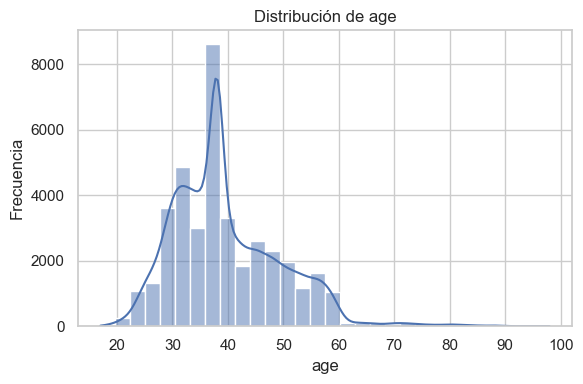

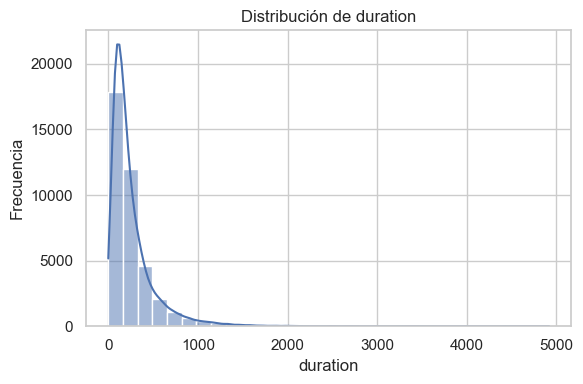

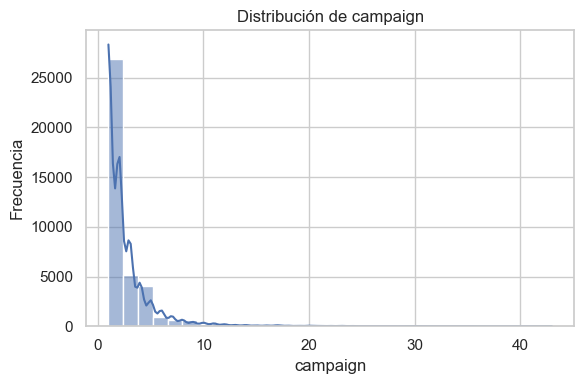

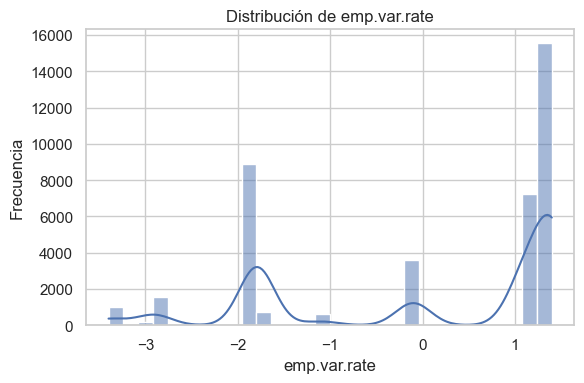

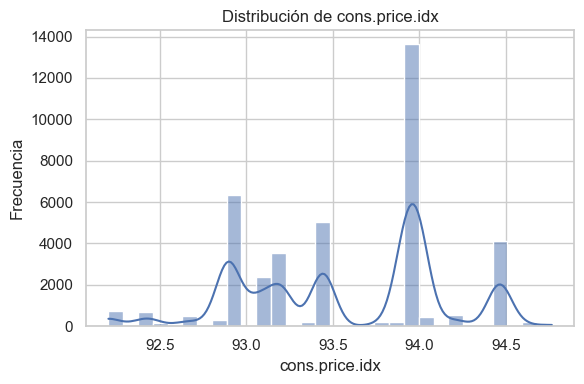

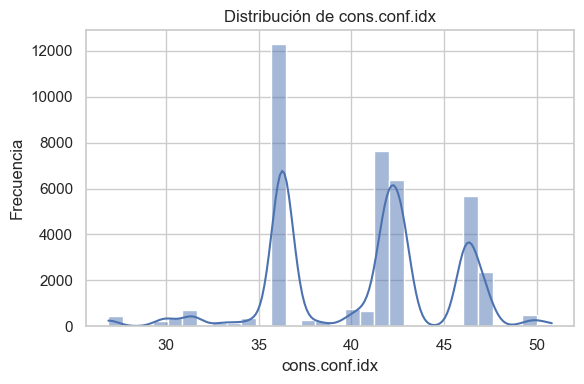

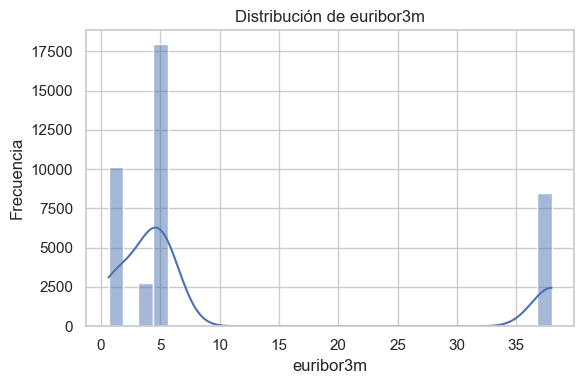

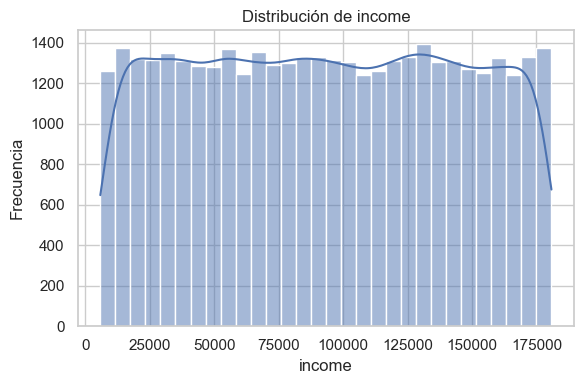

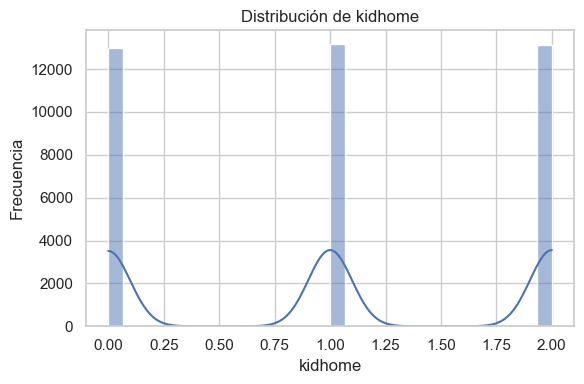

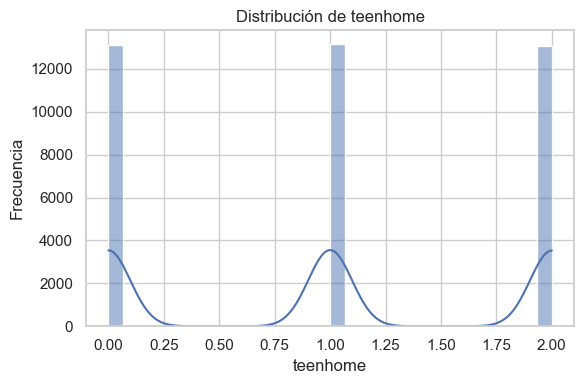

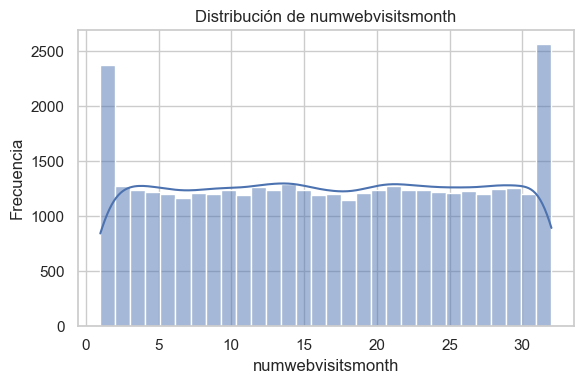

In [42]:
sns.set(style="whitegrid", context="notebook")

for col in cols_num:

    plt.figure(figsize=(6, 4)) 

    sns.histplot(df_final[col], bins=30, stat="count", kde=True )

    plt.title(f'Distribución de {col}')

    plt.xlabel(col)

    plt.ylabel('Frecuencia')

    plt.tight_layout()

    plt.show()

**Observaciones:**

`age`: La variable age muestra una concentración marcada de observaciones entre los 30 y los 50 años, configurando una distribución ligeramente sesgada a la derecha en su tramo central. Aunque presenta una ligera cola a la derecha por la existencia de edades más avanzadas, estos valores son poco frecuentes y no distorsionan de forma relevante la forma general. La variabilidad puede considerarse moderada y la presencia de outliers es limitada, lo que sugiere una distribución bastante estable y representativa del perfil típico de los clientes.

`duration`: La distribución evidencia un patrón claramente sesgado a la derecha, con una elevada concentración de llamadas de corta duración y un descenso progresivo hacia valores mayores. La cola extensa y la presencia de llamadas extremadamente largas generan una dispersión alta y un conjunto de outliers que impactan de forma notable en la media. Este comportamiento es habitual en variables de tiempo y conviene tenerlo en cuenta de cara a la modelización, ya que puede requerir transformaciones o un tratamiento específico de valores extremos.

`campaign`: La variable presenta una distribución fuertemente asimétrica hacia la derecha, donde la mayoría de los individuos recibe un número reducido de contactos entre 1 y 3, mientras que un grupo minoritario registra cifras mucho mayores. Este desequilibrio da lugar a una cola alargada y a valores atípicos que amplían el rango de la variable. Aunque la dispersión en el núcleo central es baja, la existencia de casos extremos es relevante y puede influir en el análisis.

`emp.var.rate`: Esta variable muestra una distribución discreta y multimodal, con varios picos pronunciados que reflejan distintos escenarios macroeconómicos. Los valores se concentran en un conjunto reducido de niveles, con mayor peso en torno a 1.1–1.4 y otros grupos en valores negativos como -1.8, y el rango se mantiene acotado, sin observarse valores fuera de los intervalos esperables para este indicador.

`cons.price.idx`: En este caso se presenta una distribución muy concentrada en un rango estrecho, reflejando baja variabilidad. Sin embargo, la forma es multimodal, con varios picos asociados a distintos niveles del indicador, y una mayor concentración alrededor de 94.0. No se aprecian valores fuera de los rangos esperables, por lo que no se identifican outliers relevantes.

`cons.conf.idx`: Se muestra una distribución multimodal, con varios picos pronunciados principalmente alrededor de 36–37, 42–43 y 46–47, lo que indica concentraciones en niveles específicos del indicador. El rango se mantiene acotado y no se observan valores extremos fuera de lo esperable, por lo que no se identifican outliers severos.

`euribor3m`: Presenta una distribución multimodal, con una concentración principal en torno a 4.8–5.0 y un segundo grupo en valores bajos alrededor de 1.0–1.5, lo que sugiere distintos periodos económicos con niveles de tipos de interés diferenciados. Además, se observa un pico muy elevado alrededor de 38, claramente separado del resto, el cual se puede considerar como valor extremo o posible anomalía.

`Income`: En este caso se presenta una distribución amplia y relativamente uniforme a lo largo del rango observado, sin un sesgo claramente dominante. Se aprecia una ligera disminución en los extremos, por tanto, la media y la mediana resultan similares, lo que refleja principalmente una alta dispersión y una baja asimetría.

`Kidhome`: Es una variable discreta acotada entre 0 y 2, con concentraciones claras en esos valores. Al tratarse de un recuento pequeño, la variabilidad es limitada y no existen outliers fuera del rango posible. La distribución refleja un comportamiento esperado en el número de niños en el hogar, sin valores anómalos.

`Teenhome`: Esta es una variable discreta acotada a 0, 1 y 2, con concentraciones visibles en esas categorías. Al tratarse de un recuento pequeño, la variabilidad es limitada y no existen outliers fuera del rango posible, mostrando un comportamiento consistente con la naturaleza de la variable.

`NumWebVisitsMonth`: Se muestra una distribución amplia y relativamente uniforme a lo largo del rango observado, lo que indica una alta heterogeneidad en la actividad web. Se observan picos en los valores extremos, especialmente en torno a 1 y 32, mientras que el resto de valores presenta frecuencias similares. No se identifica un sesgo dominante ni outliers fuera del rango esperado.

## Boxplot

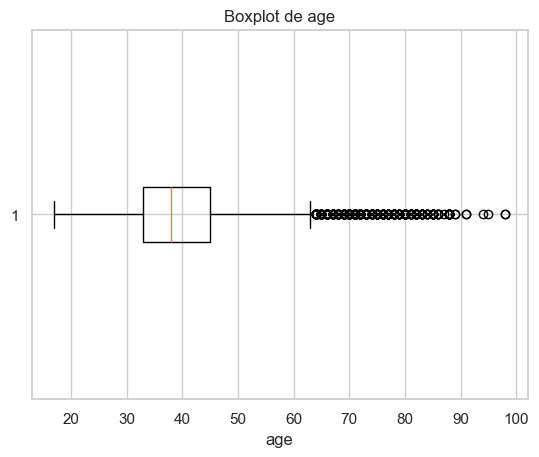

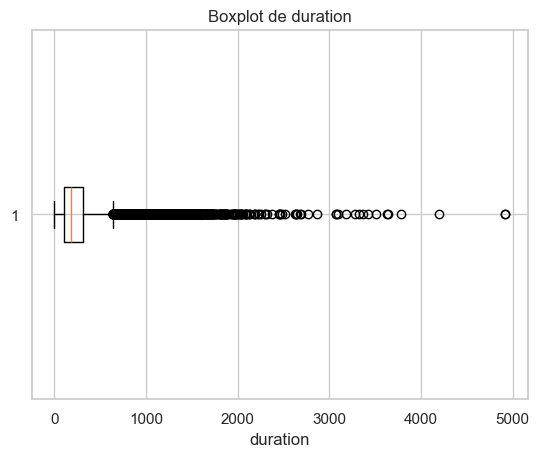

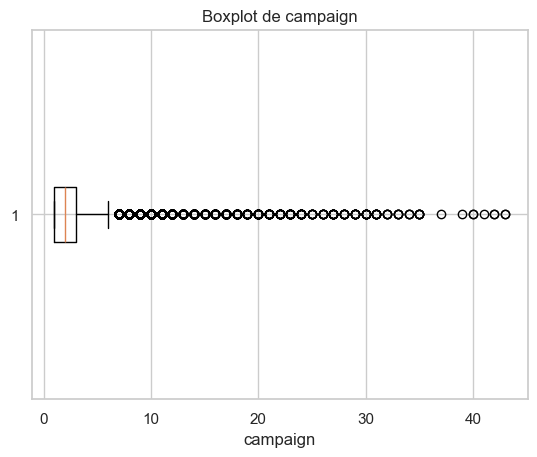

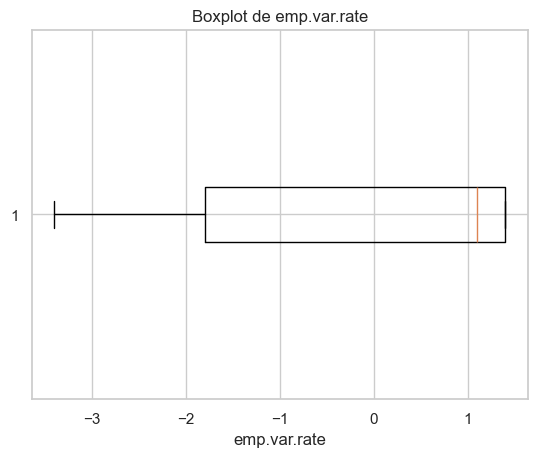

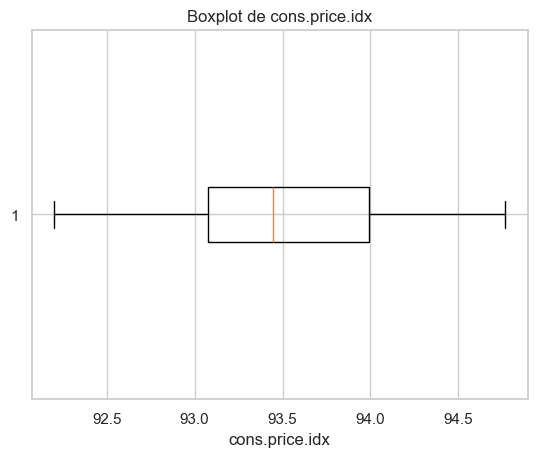

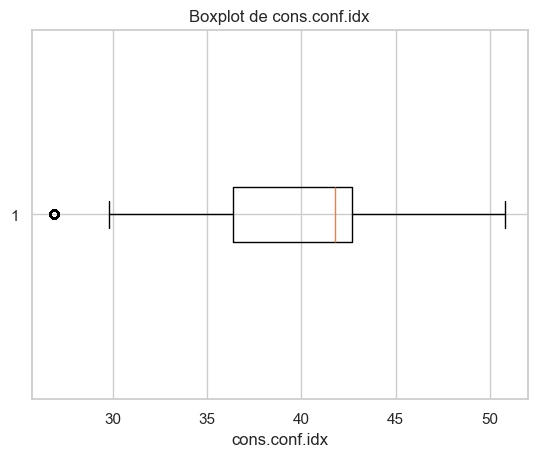

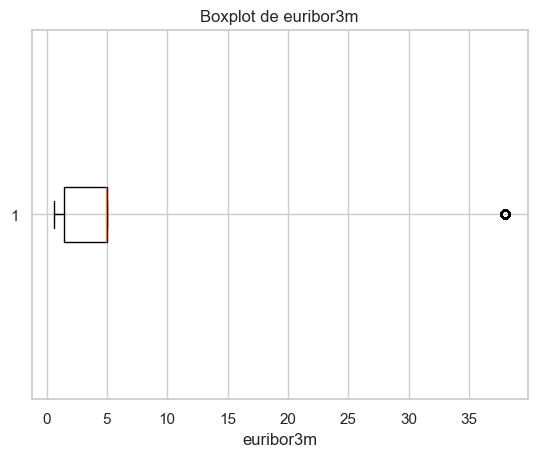

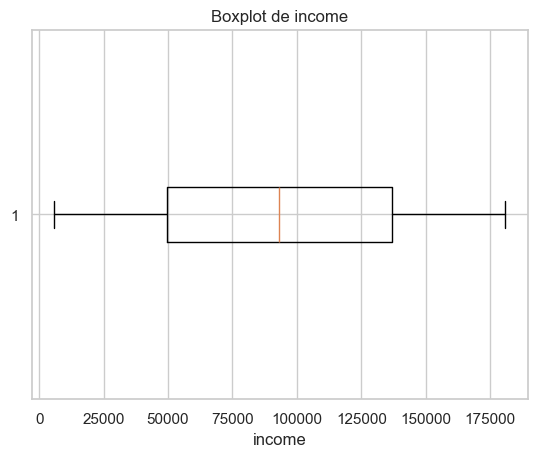

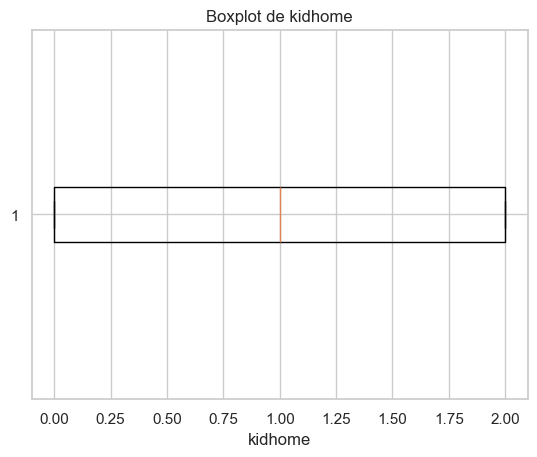

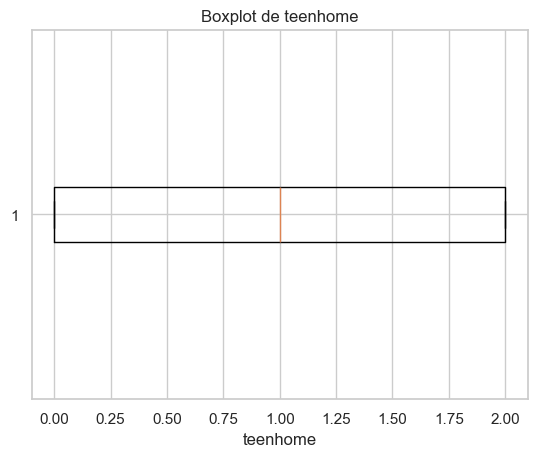

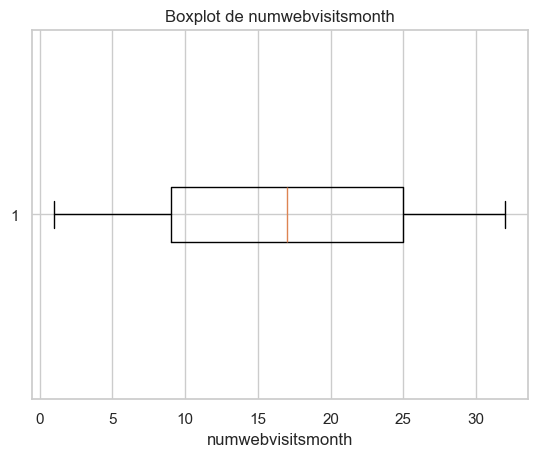

In [43]:
for col in cols_num:

    plt.boxplot(df_final[col], vert=False)

    plt.title(f'Boxplot de {col}')

    plt.xlabel(col)
    
    plt.show()

**Observaciones:**

`age`: Muestra algunos valores extremos en edades muy avanzadas, alcanzando los 98 años, claramente alejados del rango central situado entre los 30 y los 50 años. Aunque poco frecuentes, estos valores son plausibles y no parecen indicar errores de registro.

`duration`: Se observan numerosos valores atípicos en la parte alta de la distribución, destacando duraciones que llegan hasta 4.918 segundos, muy superiores al rango habitual de llamadas, generalmente por debajo de 300 segundos. Estos outliers representan llamadas excepcionalmente largas y, aunque estadísticamente extremos, son coherentes con la naturaleza de la variable.

`campaign`: La variable se concentra en valores bajos, principalmente entre 1 y 3 contactos, mientras que aparecen numerosos valores atípicos a partir de niveles más altos, llegando hasta un máximo de 43. Este patrón refleja casos de contacto intensivo sobre un grupo reducido de clientes y debe considerarse en el análisis por el efecto de la cola derecha.

`emp.var.rate`: Apenas se aprecian valores extremos. El mínimo registrado es –3.4, que aparece levemente alejado del resto, pero sigue siendo coherente con períodos económicos negativos. No se identifican outliers que resulten sospechosos o incompatibles con la variable.

`cons.price.idx`: Se concentra en un rango muy estrecho entre 92.2 y 94.77, sin presencia de outliers significativos. La estabilidad del indicador hace que cualquier valor ligeramente separado siga siendo estadísticamente y económicamente razonable.

`cons.conf.idx`: Pueden observarse valores extremos como 26.9 en el límite inferior y 50.8 en el superior. Aunque estadísticamente alejados, estos valores reflejan variaciones reales en la confianza del consumidor y no parecen indicar anomalías.

`euribor3m`: Presenta algunos valores atípicos extremos, alcanzando hasta 38, lo cual está considerablemente alejado del rango habitual de 1 a 5. Estos valores reflejan episodios de tipos de interés excepcionalmente altos, aunque siguen siendo plausibles dentro de las variaciones históricas de este indicador.

`Income`: Muestra una dispersión elevada, con un rango amplio de ingresos de 5.841 a 180.802 y una mediana situada alrededor de 92.916. No se observan outliers marcados según el criterio del boxplot, lo que sugiere que los valores extremos quedan dentro del comportamiento esperado para una variable económica con alta variabilidad.

`Kidhome`: Esta limitada a valores entre 0 y 2, no muestra outliers. Todos los registros se encuentran dentro del dominio definido y no existen valores que puedan considerarse atípicos.

`Teenhome`: Solo toma valores 0, 1 o 2, por lo que no presenta valores extremos. La distribución es completamente coherente con su naturaleza categórica discreta.

`NumWebVisitsMonth`: Se muestran algunos outliers elevados, alcanzando hasta 32 visitas mensuales, lo que está por encima del rango común de entre 9 y 25 visitas. Estos valores representan un pequeño grupo de usuarios altamente activos, lo cual es razonable dada la variabilidad en el comportamiento de los usuarios.

## Análisis univariante de variables categóricas

### Frecuencias y proporciones

In [44]:
for col in cols_cate:

    print(f'\nColumna: {col}')

    display(df_final[col].value_counts().head(10))
    
    display((df_final[col].value_counts(normalize=True).head(10) * 100).round(2))


Columna: job


job
admin.           10194
blue-collar       8793
technician        6547
services          3806
management        2805
retired           1611
entrepreneur      1403
self-employed     1395
housemaid         1029
unemployed         996
Name: count, dtype: int64

job
admin.           25.96
blue-collar      22.39
technician       16.67
services          9.69
management        7.14
retired           4.10
entrepreneur      3.57
self-employed     3.55
housemaid         2.62
unemployed        2.54
Name: proportion, dtype: float64


Columna: marital


marital
married     23762
single      11091
divorced     4419
Name: count, dtype: int64

marital
married     60.51
single      28.24
divorced    11.25
Name: proportion, dtype: float64


Columna: education


education
university.degree      12142
high.school             9494
basic.9y                6030
professional.course     5226
basic.4y                4103
basic.6y                2259
illiterate                18
Name: count, dtype: int64

education
university.degree      30.92
high.school            24.17
basic.9y               15.35
professional.course    13.31
basic.4y               10.45
basic.6y                5.75
illiterate              0.05
Name: proportion, dtype: float64


Columna: housing


housing
yes    21101
no     18171
Name: count, dtype: int64

housing
yes    53.73
no     46.27
Name: proportion, dtype: float64


Columna: loan


loan
no     33150
yes     6122
Name: count, dtype: int64

loan
no     84.41
yes    15.59
Name: proportion, dtype: float64


Columna: contact


contact
cellular     25172
telephone    14100
Name: count, dtype: int64

contact
cellular     64.1
telephone    35.9
Name: proportion, dtype: float64


Columna: poutcome


poutcome
nonexistent    33928
failure         4071
success         1273
Name: count, dtype: int64

poutcome
nonexistent    86.39
failure        10.37
success         3.24
Name: proportion, dtype: float64


Columna: y


y
no     34911
yes     4361
Name: count, dtype: int64

y
no     88.9
yes    11.1
Name: proportion, dtype: float64


Columna: id


id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
5e3483e5-236d-437d-8351-541f9d09b9dd    1
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    1
071e39a6-519d-4286-8001-88cc9b237e01    1
Name: count, dtype: int64

id
993bbbd6-4dbc-4a40-a408-f91f8462bee6    0.0
089b39d8-e4d0-461b-87d4-814d71e0e079    0.0
e9d37224-cb6f-4942-98d7-46672963d097    0.0
3f9f49b5-e410-4948-bf6e-f9244f04918b    0.0
9991fafb-4447-451a-8be2-b0df6098d13e    0.0
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    0.0
d63ede72-0b6d-45b1-8872-385ac6897f65    0.0
5e3483e5-236d-437d-8351-541f9d09b9dd    0.0
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    0.0
071e39a6-519d-4286-8001-88cc9b237e01    0.0
Name: proportion, dtype: float64

**Observaciones:**

`job`: La distribución se concentra principalmente en admin con 25,96 %, blue-collar com 22,39 % y technician con 16,67 %, que en conjunto representan una parte mayoritaria de la muestra. En un segundo nivel aparecen services con 9,69 % y management con 7,14 %. El resto de ocupaciones retired, entrepreneur, self-employed, housemaid y unemployed, presentan valores reducidos todas por debajo del 5 %. No se observa un desbalance extremo, pero sí una concentración clara en perfiles administrativos y ocupaciones manuales.

`marital`: La categoría married es claramente dominante con 60,51 %, seguida por single con 28,24 % y divorced con 11,25 %. Aunque existe una categoría mayoritaria, la distribución mantiene presencia relevante de las otras dos, lo que sugiere una segmentación razonable por estado civil.

`education`: Predominan university.degree con 30,92 % y high.school con 24,17 %. Les siguen basic.9y con 15,35 % y professional.course con 13,31 %, mientras que basic.4y con 10,45 % y basic.6y con 5,75 % tienen menor peso, la categoría illiterate con 0,05 % es residual. En conjunto, la distribución está relativamente repartida, con mayor presencia de niveles educativos medios y superiores, y sin desbalances severos salvo la práctica ausencia de analfabetismo.

`housing`: La proporción de clientes con hipoteca "yes" es de 53,73 % ligeramente superior a la de quienes no la tienen "no" con 46,27 %. La variable está bastante equilibrada, sin un desbalance marcado.

`loan`: Se observa un desbalance notable, "no" concentra el 84,41 % de los casos frente a "yes" con un 15,59 %. Esto indica que la mayoría de clientes no tiene un préstamo personal activo, y conviene considerarlo en fases posteriores, ya que la categoría yes es claramente minoritaria.

`contact`: El canal de contacto predominante es cellular con 64,10 %, frente a telephone que presenta un 35,90 %. Existe una preferencia clara por el contacto móvil, aunque ambas categorías mantienen un volumen significativo.

`poutcome`: La variable está fuertemente desbalanceada, nonexistent con un 86,39 % agrupa la mayoría de registros, mientras que failure con un 10,37 % y especialmente success con un 3,24 % aparecen con mucha menor frecuencia. Esto sugiere que, en la mayoría de casos, no hay un resultado registrado de campañas previas y que los éxitos anteriores son poco comunes.

`y`: Como variable objetivo, presenta un desbalance muy acusado: "no" concentra el 88,90 % de los casos, frente a "yes" con solo el 11,10 %. Este desbalance implica que la mayoría de observaciones pertenecen a la clase “no”, por lo que el modelo podría tender a predecir esa categoría; en consecuencia, será clave priorizar métricas orientadas a la clase “yes” y aplicar estrategias para mejorar su detección.

`id`: Corresponde a un identificador único, cada valor aparece una sola vez. Por tanto, no es una variable categórica interpretable en términos de distribución de grupos, sino una clave de identificación sin valor analítico directo.

## Gráficos de barras

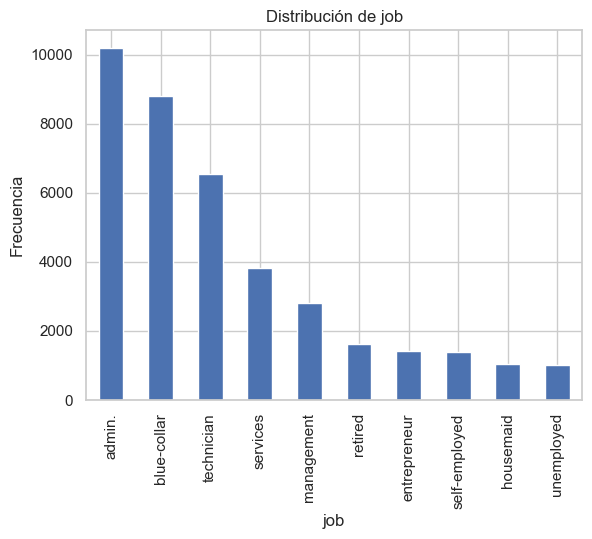

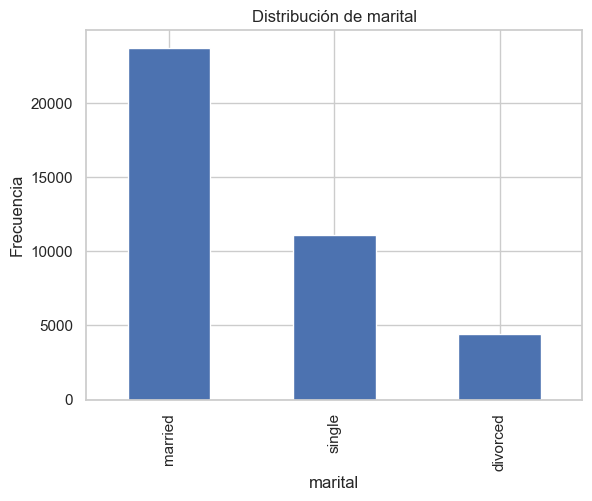

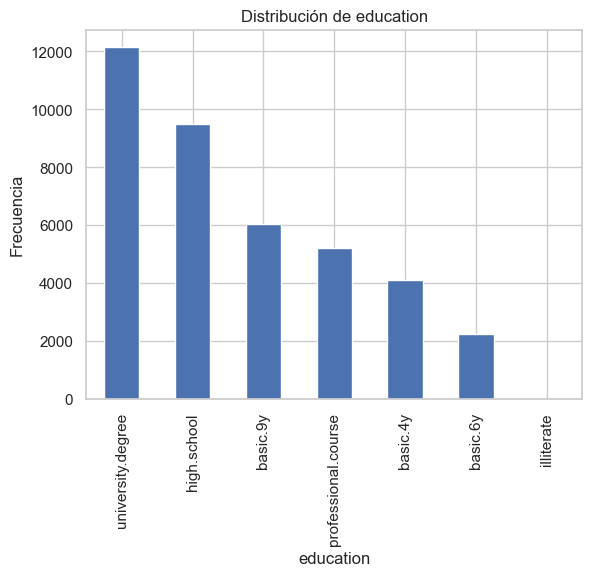

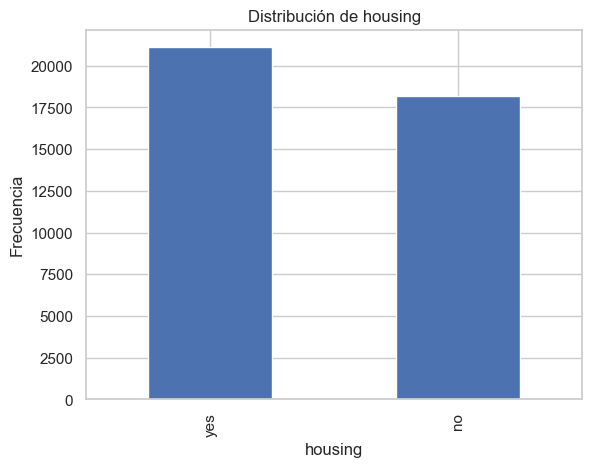

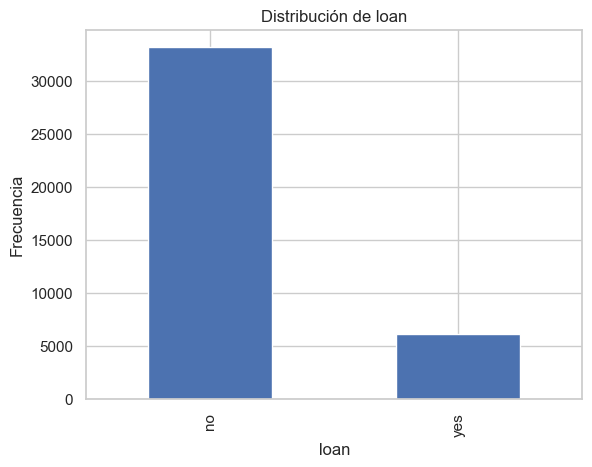

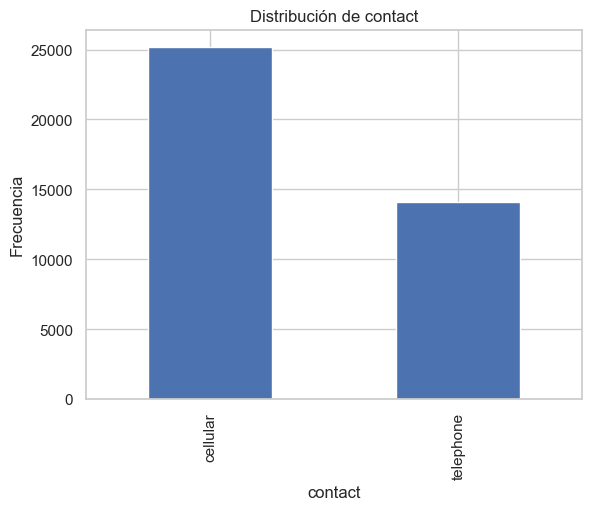

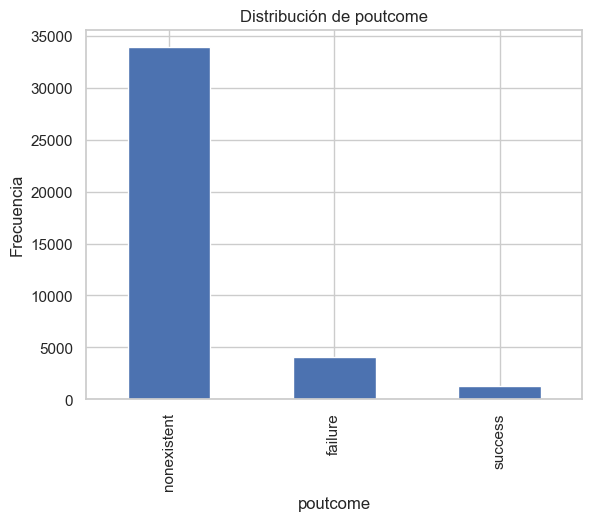

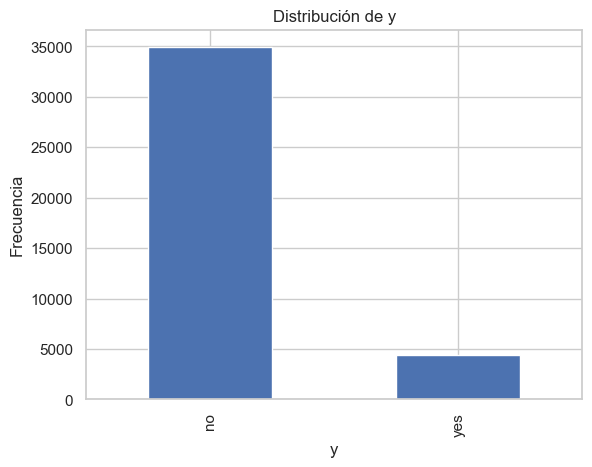

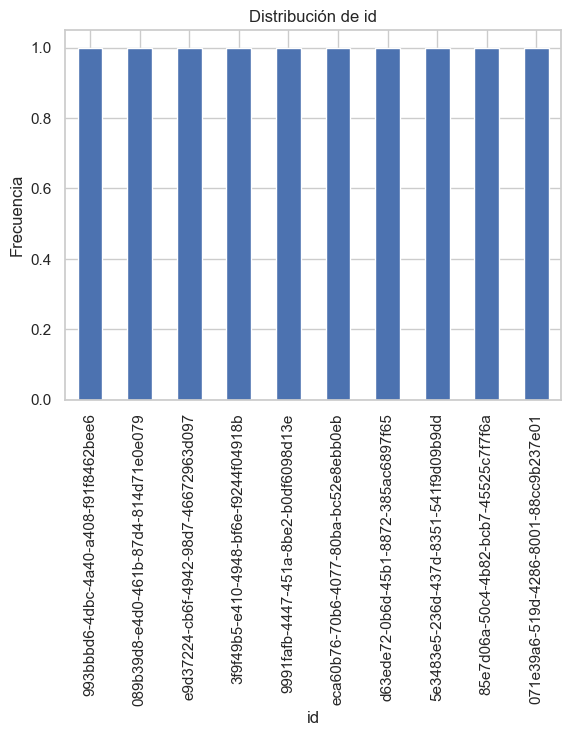

In [45]:
for col in cols_cate:

    df_final[col].value_counts().head(10).plot(kind='bar')

    plt.title(f'Distribución de {col}')

    plt.ylabel('Frecuencia')
    
    plt.show()

**Observaciones:**

`job`: La distribución se concentra principalmente en los perfiles admin. con un 25,96 %, blue-collar con un 22,39 % y technician con un 16,67 %, que agrupan la mayor parte de los registros. El resto de ocupaciones presenta frecuencias sensiblemente menores. Esta variable es relevante porque la ocupación suele relacionarse con estabilidad laboral y capacidad económica, factores que pueden influir en la respuesta a la campaña.

`education`: Predominan los niveles university.degree con un 30,92 % y high.school con un 24,17 %, seguidos por categorías intermedias como basic.9y con un 15,35 % y professional.course con un 13,31 %. La categoría illiterate es prácticamente residual con un 0,05 %. La distribución sugiere un mayor peso de niveles medios y altos, útil para contextualizar el perfil formativo y su posible relación con la contratación.

`housing`: La distribución es bastante equilibrada entre "yes" con un 53,73 % y "no" con un 46,27 %, sin un desbalance acusado. Tener hipoteca puede reflejar nivel de endeudamiento y perfil financiero, por lo que resulta pertinente para contrastarla con la variable objetivo.

`loan`: Se observa un desbalance claro, donde "no" concentra el 84,41 % y "yes" el 15,59 %. El grupo minoritario con préstamo personal puede comportarse de forma distinta ante una oferta de ahorro, ya sea por mayor carga financiera o por una relación más activa con la entidad.

`contact`: Predomina el canal cellular con un 64,1 % frente a telephone con un 35,9 %. El método de contacto es relevante porque puede condicionar la accesibilidad y la efectividad de la interacción, además de estar asociado a diferencias de perfil y hábitos de comunicación.

`poutcome`: La categoría nonexistent concentra el 86,39 % de los casos, mientras que failure representa el 10,37 % y success el 3,24 %. Esto indica que la mayoría no tiene un resultado previo registrado, aun así, cuando existe historial, la variable puede aportar información muy valiosa sobre la probabilidad de conversión. La categoría failure triplica a success, lo que indica que, cuando existe un resultado de campaña previa registrado, predominan los desenlaces no favorables y los casos de éxito son minoritarios.

`y`: La variable objetivo presenta un desequilibrio muy marcado, con "no" en el 88,9 % de los registros y "yes" en el 11,1 %. Esto confirma que la contratación es minoritaria.

## Variable objetivo `y`

### Distribución de `y`

La variable objetivo `y` recoge si el cliente ha contratado o no el producto tras la campaña. El recuento muestra **34.911 “no”** frente a **4.361 “si”**, lo que supone aproximadamente un **88,9 %** de respuestas negativas y un **11,1 %** de respuestas positivas.

Esta distribución pone de manifiesto un fuerte desbalance de clases, con una tasa de conversión cercana al 11 %. En consecuencia, un modelo que predijera siempre `"no"` tendría una precisión aparente elevada, pero sería inútil para identificar clientes propensos a responder positivamente.

En resumen, la variable `y` confirma un escenario típico de campañas de marketing directo: muchas negativas y pocas conversiones, lo que condiciona de forma directa el enfoque que deberá adoptarse en los modelos predictivos.

## Análisis bivariante de variables numéricas vs `y`

### Boxplots agrupados por valor de `y`

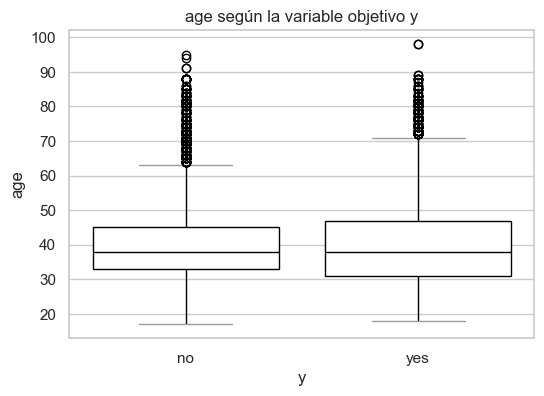

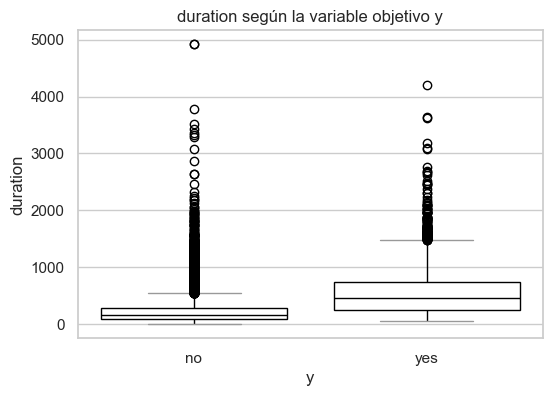

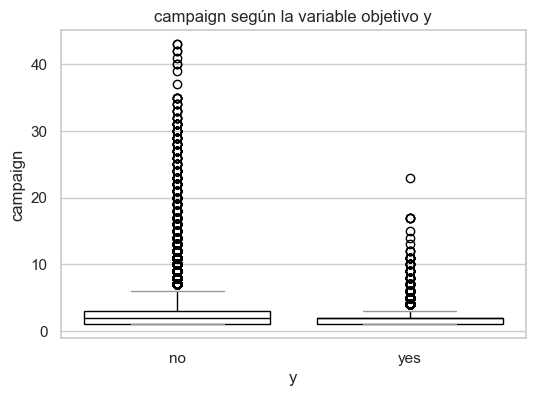

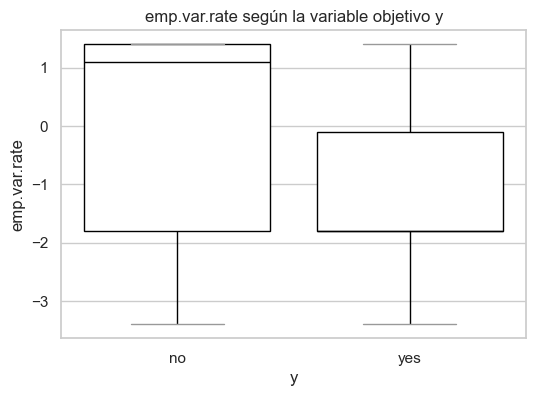

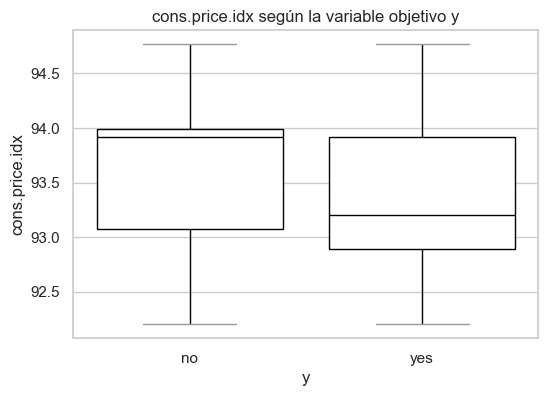

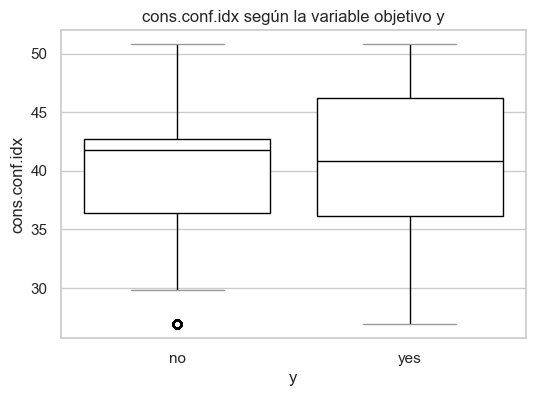

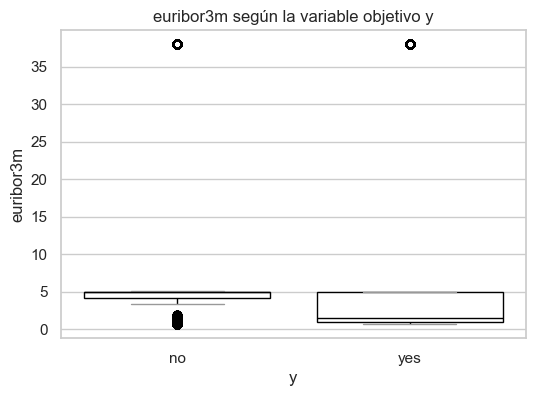

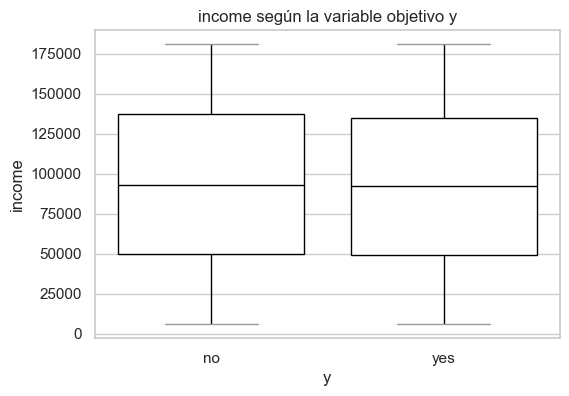

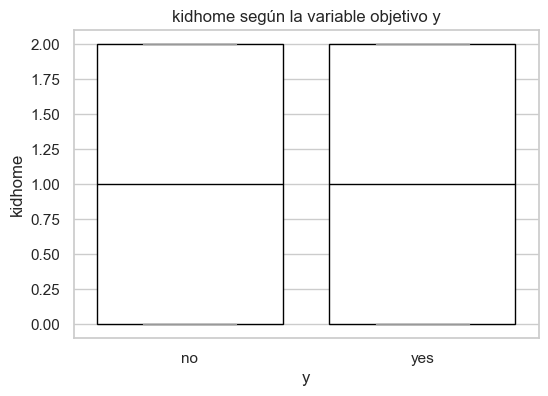

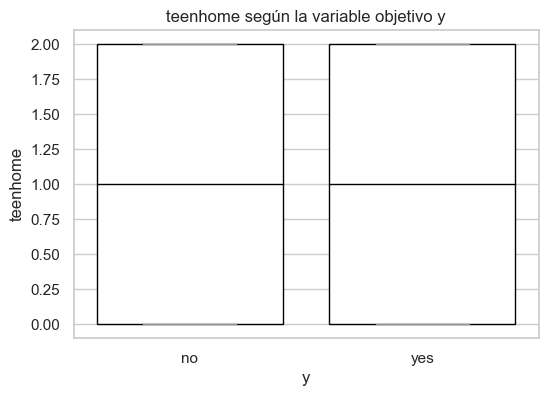

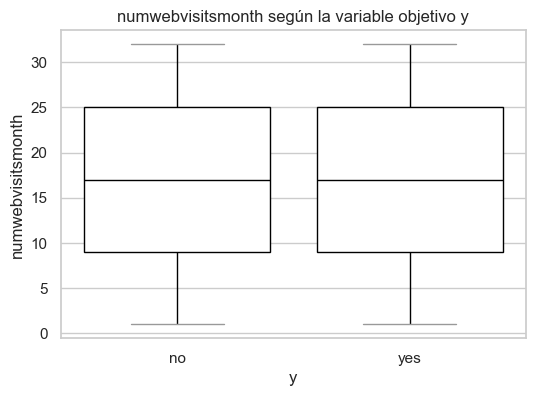

In [46]:
for col in cols_num:

    plt.figure(figsize=(6, 4))

    sns.boxplot(
        
        x='y',

        y=col,

        data=df_final,

        color='white', 

        boxprops={'edgecolor': 'black'},

        whiskerprops={'color': 'black'},

        medianprops={'color': 'black'},

        flierprops={'markeredgecolor': 'black'})
    
    plt.title(f'{col} según la variable objetivo y')
    
    plt.show()

**Observaciones:**

`age`: Los boxplots de age para y = "no" y y = "yes" son muy similares, con medianas prácticamente coincidentes y rangos intercuartílicos comparables. Se aprecian valores altos aislados en ambos grupos, correspondientes a edades avanzadas, pero no generan una separación clara entre clases. En conjunto, la edad no parece un factor discriminante relevante.

`duration`: Se observa una diferencia más marcada entre clases, el grupo y = "yes" presenta una mediana y un rango intercuartílico claramente superiores al de y = "no", además de una mayor dispersión. También aparecen valores extremos en ambos grupos, coherentes con llamadas excepcionalmente largas. Este patrón refuerza que las llamadas con conversión tienden a durar más.

`campaign`: Las medianas son cercanas entre y = "no" y y = "yes", pero el grupo y = "no" muestra una mayor dispersión y, sobre todo muchos más valores extremos, alcanzando registros muy altos de contactos. En y = "yes" también hay outliers, aunque menos numerosos y con máximos más contenidos. Esto sugiere que un número muy elevado de contactos no se asocia necesariamente con una mayor probabilidad de éxito.

`emp.var.rate`: El boxplot de y = "yes" está desplazado hacia valores más bajos, con una mediana claramente más negativa que la de y = "no". Esto indica que las contrataciones se concentran relativamente más en periodos con menor variación del empleo, lo que apunta a una relación con el contexto macroeconómico.

`cons.price.idx`: El grupo y = "yes" aparece ligeramente desplazado hacia valores inferiores respecto a y = "no". La diferencia no es grande, pero el desplazamiento es consistente y sugiere que las respuestas positivas se producen con mayor frecuencia en niveles algo más bajos del índice.

`cons.conf.idx`: La separación entre clases es moderada, y = "yes" muestra una mediana algo inferior y una dispersión ligeramente mayor, mientras que y = "no" presenta algún valor extremo en la parte baja. En conjunto, parece haber una leve tendencia a respuestas positivas en contextos de menor confianza, aunque no es una diferencia contundente.

`euribor3m`: La diferencia entre clases es clara, y = "yes" se concentra en niveles más bajos de euríbor, mientras que y = "no" tiene la mediana más alta. Además, se aprecia al menos un valor extremo muy alto alrededor de 38 en ambos grupos, que actúa como outlier. El patrón general sugiere mayor probabilidad de contratación cuando el euríbor es más bajo.

`income`: Los boxplots de income son muy parecidos en mediana y dispersión entre y = "no" y y = "yes". No se observan outliers destacados según el criterio del boxplot, aunque el rango total es amplio. Visualmente, el nivel de ingresos no muestra una diferencia clara entre quienes contratan y quienes no.

`kidhome`: En los boxplots se observa que y = "no" y y = "yes" son prácticamente idénticos. La mediana se sitúa en torno a 1 hijo y el rango se mantiene dentro de los valores posibles de la variable, de 0 a 2. No se observa separación entre grupos, por lo que el número de niños en el hogar no parece diferenciar la contratación.

`teenhome`: Se repite el mismo patrón que en kidhome. Ambos grupos presentan la misma mediana y una dispersión equivalente dentro del rango 0–2, sin valores extremos. En consecuencia, el número de adolescentes en el hogar tampoco muestra relación clara con la respuesta a la campaña.

`numwebvisitsmonth`: Los boxplots muestran distribuciones muy similares entre y = "no" y y = "yes", con medianas prácticamente coincidentes y un rango intercuartílico comparable. La variabilidad es moderada y no se aprecia un desplazamiento sistemático entre clases, lo que sugiere que la actividad web mensual no discrimina de forma relevante la contratación.

In [47]:
df_final.groupby('y')[cols_num].median().T

y,no,yes
age,38.0,38.0
duration,163.0,453.0
campaign,2.0,2.0
emp.var.rate,1.1,-1.8
cons.price.idx,93.918,93.2
cons.conf.idx,41.8,40.8
euribor3m,4.958,1.405
income,93042.0,91922.0
kidhome,1.0,1.0
teenhome,1.0,1.0


**Observaciones:**

`age`: La mediana es 38 años tanto en y = "no" como en y = "yes". Esto es consistente con los boxplots, que muestran medianas y rango intercuartílico muy similares. La edad no parece diferenciar de forma clara la contratación en términos de valor central.

`duration`: Es la variable con mayor separación entre clases. La mediana pasa de 163 segundos en y = "no" a 453 segundos en y = "yes". En los boxplots se aprecia un desplazamiento claro del grupo yes hacia duraciones más altas, lo que indica una asociación fuerte entre llamadas más largas y mayor probabilidad de contratación.

`campaign`: La mediana es 2 en ambos grupos, por lo que el “número típico” de contactos no cambia entre no y yes. Sin embargo, los boxplots sí muestran diferencias en los extremos: el grupo no presenta muchos más valores altos y una cola más larga, lo que sugiere que los casos con muchos intentos de contacto tienden a concentrarse en clientes que no acaban contratando.

`emp.var.rate`: La mediana baja de 1.1 en y = "no" a −1.8 en y = "yes". El boxplot confirma este desplazamiento hacia valores más negativos en el grupo yes, indicando que las contrataciones aparecen con mayor frecuencia en periodos con menor variación del empleo. Es una relación descriptiva del contexto, no una prueba de causalidad.

`cons.price.idx`: La mediana es 93.918 en y = "no" y 93.2 en y = "yes". La diferencia es moderada, pero el boxplot del grupo yes queda ligeramente desplazado a valores inferiores. Esto sugiere que las respuestas positivas se concentran algo más en periodos con niveles algo menores del índice.

`cons.conf.idx`: La mediana disminuye de 41.8 en y = "no" a 40.8 en y = "yes". En el boxplot se aprecia una ligera bajada en el grupo yes, aunque con bastante solapamiento entre ambos grupos. La diferencia existe, pero es menos marcada que en duration o euribor3m.

`euribor3m`: La mediana cae de 4.958 en y = "no" a 1.405 en y = "yes". El boxplot refleja un desplazamiento muy claro del grupo yes hacia tipos más bajos, por lo que esta variable destaca como una de las más asociadas a la contratación dentro del bloque macroeconómico.

`income`: La mediana es 93042 en y = "no" y 91922 en y = "yes", una diferencia pequeña. Los boxplots son muy parecidos en nivel central y dispersión, por lo que el ingreso no muestra una separación visual relevante entre clases en este análisis.

`kidhome`: La mediana es 1 en ambos grupos y los boxplots son prácticamente idénticos. No se aprecia relación clara entre el número de niños en el hogar y la contratación.

`teenhome`: La mediana también es 1 en ambos grupos, con boxplots equivalentes. No hay evidencia visual de diferencias entre clases.

`numwebvisitsmonth`: La mediana es 17 tanto en y = "no" como en y = "yes". Los boxplots muestran un solapamiento casi total, por lo que la frecuencia de visitas web no parece discriminar la contratación en términos de valor central.

En conjunto, el análisis bivariante de las variables numéricas frente a `y` muestra un patrón claro, duration es la variable con mayor capacidad para diferenciar entre yes y no, ya que las llamadas asociadas a contrataciones presentan valores centrales y rangos notablemente superiores. Además, el bloque macroeconómico también aporta información, con medianas más bajas en el grupo yes, destacando especialmente euribor3m y, en menor medida, emp.var.rate, cons.price.idx y cons.conf.idx, lo que sugiere que el contexto económico del contacto se asocia con la probabilidad de éxito. En cambio, el resto de variables numéricas mantiene medianas muy similares y boxplots ampliamente solapados, por lo que su contribución explicativa resulta limitada en este nivel descriptivo.

## Análisis bivariante de variables catégoricas vs `y`

### Tablas de contingencia

In [48]:
for col in cols_cate:

    print(f'\nRelación entre {col} e y')

    tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100
    
    display(tabla.round(2))


Relación entre job e y


y,no,yes
job,,
admin.,87.06,12.94
blue-collar,93.02,6.98
entrepreneur,91.95,8.05
housemaid,90.28,9.72
management,88.91,11.09
retired,75.36,24.64
self-employed,88.82,11.18
services,92.07,7.93
student,70.42,29.58



Relación entre marital e y


y,no,yes
marital,,
divorced,89.70,10.30
married,89.90,10.10
single,86.43,13.57



Relación entre education e y


y,no,yes
education,,
basic.4y,89.64,10.36
basic.6y,91.81,8.19
basic.9y,92.32,7.68
high.school,89.09,10.91
illiterate,77.78,22.22
professional.course,88.67,11.33
university.degree,86.36,13.64



Relación entre housing e y


y,no,yes
housing,,
no,89.25,10.75
yes,88.59,11.41



Relación entre loan e y


y,no,yes
loan,,
no,88.81,11.19
yes,89.38,10.62



Relación entre contact e y


y,no,yes
contact,,
cellular,85.57,14.43
telephone,94.84,5.16



Relación entre poutcome e y


y,no,yes
poutcome,,
failure,86.51,13.49
nonexistent,91.20,8.80
success,35.19,64.81



Relación entre y e y


y,no,yes
y,,
no,100.0,0.0
yes,0.0,100.0



Relación entre id e y


y,no,yes
id,,
0000e811-006e-4404-b535-89bf6cd96553,100.0,0.0
0000ea53-e9b2-4b3f-9f4b-058f37e5fab8,0.0,100.0
000165f9-20c0-4cb5-bd47-6233b92655c1,100.0,0.0
00024507-c59b-4eee-86d5-cc341b96eb6d,100.0,0.0
0004e1d1-958d-4abf-a57c-9b9c7be887a0,0.0,100.0
...,...,...
fff67187-c301-41e8-a58a-b2daf7ff17e0,100.0,0.0
fffbc6e6-cc6b-43e7-8541-6318cfb030c6,100.0,0.0
fffd1227-80ee-4feb-98e0-3e4c7f8c30fd,100.0,0.0


**Observaciones:**

`job`: Se aprecian diferencias relevantes en la tasa de contratación. Tomando como referencia la tasa global de yes, que es 11,1 %, destacan claramente student con 29,58 % y retired con 24,64 %, muy por encima del promedio. También se sitúan por encima unemployed con 14,66 % y admin. con 12,94 %. En el lado opuesto, blue-collar con 6,98 %, services con 7,93 % y entrepreneur con 8,05 % muestran tasas sensiblemente inferiores. En conjunto, la ocupación parece estar asociada a diferencias claras en la probabilidad de contratación.

`marital`: Las diferencias son moderadas. single presenta una tasa de yes de 13,57 %, por encima del promedio global, mientras que married con 10,10 % y divorced con 10,30 % quedan ligeramente por debajo. Esto sugiere una mayor propensión en clientes solteros, aunque sin una separación muy marcada.

`education`: Se observa un patrón en el que niveles educativos más altos tienden a asociarse con mayor tasa de yes. university.degree alcanza 13,64 % y professional.course 11,33 %, por encima o muy cerca del promedio. En cambio, los niveles básicos quedan por debajo, como basic.9y con 7,68 % y basic.6y con 8,19 %. high.school queda muy próximo al promedio con 10,91 %. La categoría illiterate muestra 22,22 %, pero debe interpretarse con cautela porque su tamaño muestral es muy reducido.

`housing`: La diferencia es pequeña. Los clientes con housing = yes presentan 11,41 % de yes frente a 10,75 % en housing = no. En términos descriptivos, la hipoteca no parece separar de forma clara la respuesta.

`loan`: Las tasas son prácticamente similares. loan = no tiene 11,19 % de yes y loan = yes 10,62 %. La variable no muestra un efecto apreciable en este análisis descriptivo.

`contact`: Es una de las variables con mayor contraste. cellular alcanza 14,43 % de yes, claramente por encima del promedio, mientras que telephone cae a 5,16 %. Esto indica que el canal de contacto está fuertemente asociado a la tasa de contratación, con mejor rendimiento en móvil.

`poutcome`: Es la variable más discriminativa. Cuando el resultado previo es success, la tasa de yes sube a 64,81 %, muy superior al resto. failure presenta 13,49 %, ligeramente por encima del promedio. En cambio, nonexistent baja a 8,80 %, por debajo del promedio. Esto sugiere que un antecedente de éxito previo es un indicador muy fuerte de contratación en la campaña actual.

`y e id`: La tabla y frente a y no aporta información útil porque es una comparación trivial por construcción. La variable id tampoco es interpretable como predictor, ya que es un identificador único y cada valor queda asociado a una única clase, por lo que solo funciona como clave técnica del registro.

### Barras apiladas

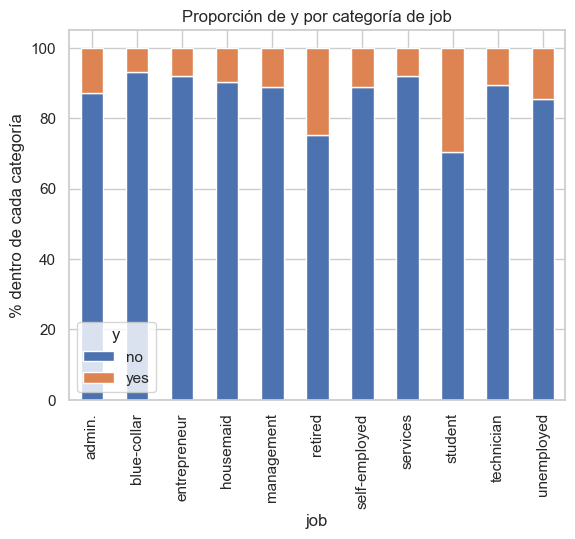

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,87.06,93.02,91.95,90.28,88.91,75.36,88.82,92.07,70.42,89.34,85.34
yes,12.94,6.98,8.05,9.72,11.09,24.64,11.18,7.93,29.58,10.66,14.66


In [49]:
col = 'job'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`job`: El gráfico evidencia una heterogeneidad clara en la proporción de y = "yes" según la ocupación. Destacan especialmente student con 29,58 % y retired con 24,64 %, muy por encima de la tasa global de contratación, que ronda el 11 %. También se sitúan por encima de esa referencia unemployed con 14,66 % y admin. con 12,94 %. En cambio, categorías como blue-collar con 6,98 %, services con 7,93 % y entrepreneur con 8,05 % presentan tasas de respuesta sensiblemente menores. En conjunto, la ocupación aparece asociada a diferencias relevantes en la probabilidad de contratación.

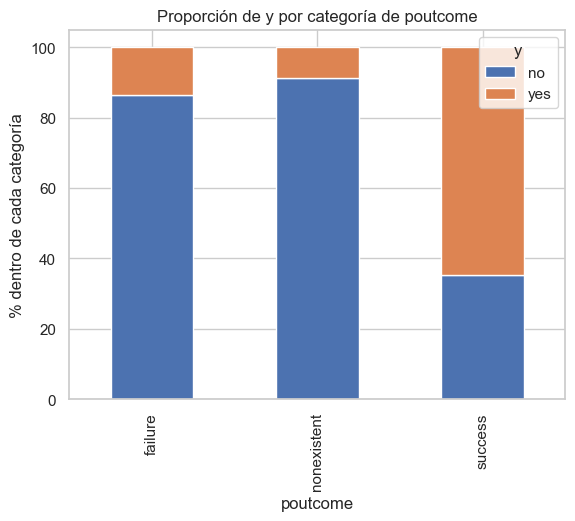

poutcome,failure,nonexistent,success
y,,,
no,86.51,91.2,35.19
yes,13.49,8.8,64.81


In [50]:
col = 'poutcome'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`poutcome`: Es la variable que muestra el contraste más marcado entre categorías. Cuando el resultado previo fue success, la proporción de y = "yes" alcanza el 64,81 %, por lo que la respuesta positiva pasa a ser mayoritaria dentro de ese grupo. En failure, la tasa de y = "yes" es del 13,49 %, ligeramente por encima del promedio global, mientras que en nonexistent desciende al 8,80 %, claramente por debajo. En conjunto, el histórico de campañas previas, y especialmente haber tenido un success, se asocia fuertemente con una mayor probabilidad de contratación en la campaña actual.

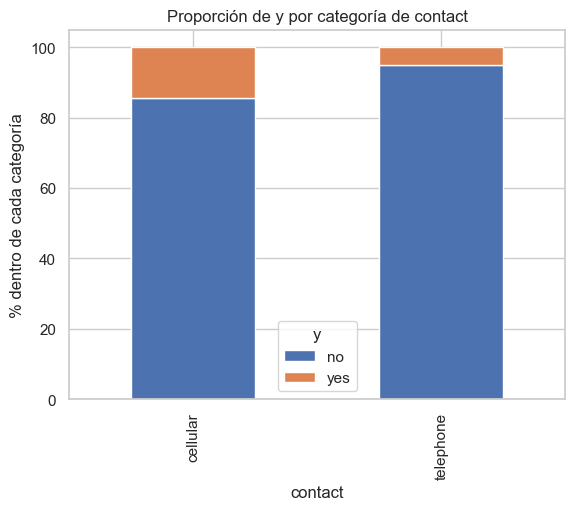

contact,cellular,telephone
y,,
no,85.57,94.84
yes,14.43,5.16


In [51]:
col = 'contact'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`contact`: Se aprecia una diferencia clara entre canales. Cuando el contacto se realiza por cellular, la proporción de y = "yes" es del 14,43 %, mientras que con telephone desciende al 5,16 %. En el gráfico esto se refleja en un segmento yes mucho más amplio en cellular y claramente reducido en telephone, lo que sugiere que el canal móvil es considerablemente más eficaz para obtener respuestas positivas en la campaña.

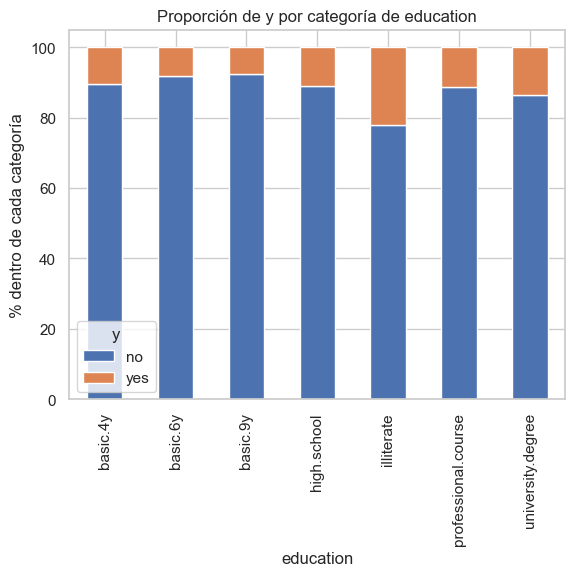

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
y,,,,,,,
no,89.64,91.81,92.32,89.09,77.78,88.67,86.36
yes,10.36,8.19,7.68,10.91,22.22,11.33,13.64


In [52]:
col = 'education'

tabla = pd.crosstab(df_final[col], df_final['y'], normalize='index') * 100

tabla.plot(kind='bar', stacked=True)

plt.title(f'Proporción de y por categoría de {col}')

plt.ylabel('% dentro de cada categoría')

plt.show()

tabla.round(2).T

`education`: Se aprecia un patrón en el que los niveles formativos más altos presentan una mayor proporción de respuesta positiva. university.degree alcanza un 13,64 % de y = "yes" y professional.course un 11,33 %, situándose en torno o por encima de la tasa global. En cambio, los niveles básicos muestran valores inferiores, con basic.4y en 10,36 %, basic.6y en 8,19 % y basic.9y en 7,68 %. high.school queda en un punto intermedio con 10,91 %. La categoría illiterate destaca con un 22,22 %, aunque debe interpretarse con cautela porque su frecuencia es muy reducida. En conjunto, el gráfico sugiere que un mayor nivel educativo se asocia con una mayor probabilidad de respuesta positiva.

## Correlación entre las variables numéricas

### Matriz de correlación

In [53]:
corr_matrix = df_final[cols_num].corr()

corr_matrix.round(2)

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,income,kidhome,teenhome,numwebvisitsmonth
age,1.00,0.00,0.00,-0.01,-0.00,-0.12,-0.00,0.00,-0.00,0.00,-0.00
duration,0.00,1.00,-0.07,-0.02,0.01,0.01,-0.01,-0.00,-0.00,-0.01,0.00
campaign,0.00,-0.07,1.00,0.15,0.13,0.01,0.01,-0.01,-0.01,0.00,0.00
emp.var.rate,-0.01,-0.02,0.15,1.00,0.78,-0.21,0.09,-0.01,-0.01,0.00,-0.01
cons.price.idx,-0.00,0.01,0.13,0.78,1.00,-0.07,0.06,-0.01,0.00,0.00,-0.01
cons.conf.idx,-0.12,0.01,0.01,-0.21,-0.07,1.00,-0.03,-0.00,0.00,-0.00,-0.00
euribor3m,-0.00,-0.01,0.01,0.09,0.06,-0.03,1.00,0.00,-0.01,0.00,0.00
income,0.00,-0.00,-0.01,-0.01,-0.01,-0.00,0.00,1.00,0.00,0.01,0.01
kidhome,-0.00,-0.00,-0.01,-0.01,0.00,0.00,-0.01,0.00,1.00,0.00,-0.00
teenhome,0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.01,0.00,1.00,-0.00


**Observaciones:**

En conjunto, la matriz refleja correlaciones bajas entre la mayoría de variables numéricas, lo que sugiere una multicolinealidad limitada en el dataset. La relación más relevante se observa entre emp.var.rate y cons.price.idx, con una correlación positiva alta de 0.78, indicando que ambas variables se mueven de forma similar y podrían estar capturando parte de un mismo componente macroeconómico. También aparece una correlación moderada y negativa entre emp.var.rate y cons.conf.idx de -0.21, lo que apunta a que escenarios con menor variación del empleo tienden a asociarse con valores más altos del índice de confianza en este conjunto.

Por su parte, duration presenta correlaciones prácticamente nulas con el resto de variables, lo que es coherente con su naturaleza operativa, ya que depende de la interacción durante la llamada y no del perfil del cliente ni del contexto económico. Variables como age, income y numwebvisitsmonth también muestran asociaciones muy débiles con el resto, lo que sugiere que aportan información relativamente independiente dentro del conjunto de datos.

### Mapa de calor

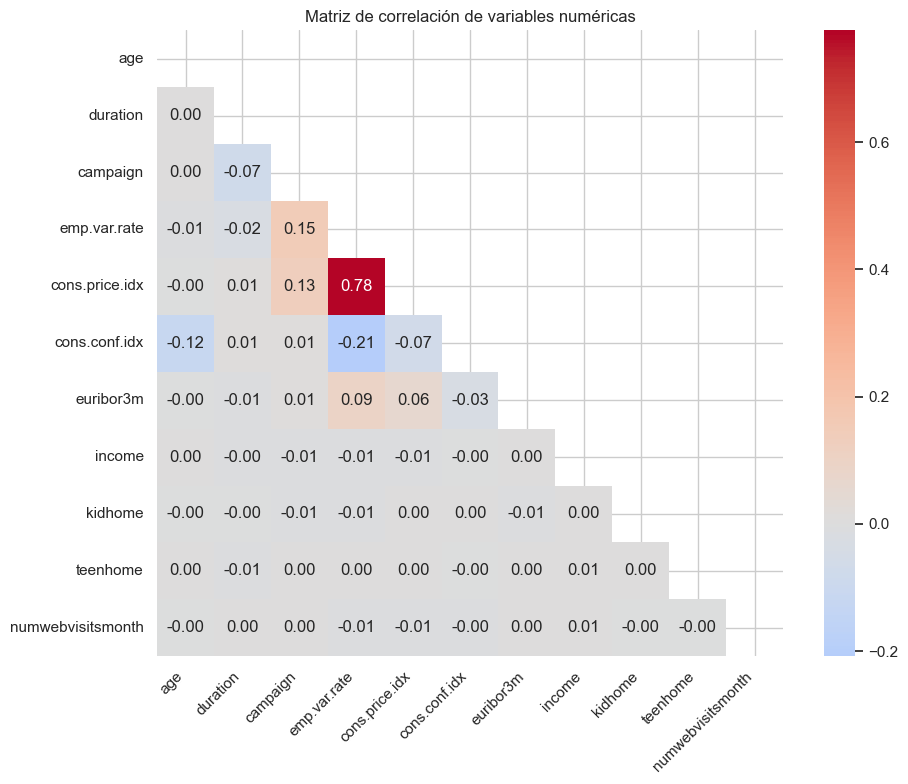

In [54]:
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap( corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)

plt.title('Matriz de correlación de variables numéricas')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

**Observaciones:**

El mapa de calor permite visualizar de forma rápida la intensidad y el sentido de las correlaciones entre las variables numéricas. La paleta divergente centrada en cero facilita identificar qué relaciones son positivas y cuáles negativas, mientras que el uso del triángulo inferior evita duplicidades y simplifica la lectura.

En los resultados destaca especialmente la correlación positiva alta entre emp.var.rate y cons.price.idx, con un valor de 0.78, lo que sugiere que ambas variables se mueven de forma muy similar y podrían estar capturando un mismo componente del contexto macroeconómico. También se observa una relación negativa moderada entre emp.var.rate y cons.conf.idx, con un valor de -0.21, indicando que cuando aumenta la variación del empleo, tiende a disminuir el índice de confianza del consumidor dentro de este conjunto. El resto de correlaciones se mantienen muy cercanas a cero, incluyendo euribor3m, que presenta asociaciones débiles con las demás variables.

En conjunto, el mapa confirma que la mayoría de variables numéricas aportan información relativamente independiente y que las dependencias más relevantes se concentran en el entorno macroeconómico, principalmente en la relación entre emp.var.rate y cons.price.idx.

## Análisis temporal

### Creación de variables temporales

Se generan las variables `year_contact` y `month_contact` a partir de la variable `date`, extrayendo respectivamente el año y el mes en formato numérico. Estas variables permiten analizar la evolución de la campaña en el tiempo, así como identificar posibles patrones estacionales o cambios de comportamiento por periodo.

In [55]:
df_final['year_contact']  = df_final['date'].dt.year

df_final['month_contact'] = df_final['date'].dt.month

print(df_final['year_contact'])

print(df_final['month_contact'])

0        2019
1        2016
2        2019
3        2015
4        2017
         ... 
39267    2015
39268    2018
39269    2016
39270    2019
39271    2019
Name: year_contact, Length: 39272, dtype: int32
0         8
1         9
2         2
3        11
4         1
         ..
39267    10
39268     3
39269     9
39270     9
39271    11
Name: month_contact, Length: 39272, dtype: int32


A partir de la variable `dt_Customer` se derivan las nuevas columnas `year_customer` y `month_customer`, que recogen el año y el mes en que cada usuario se incorporó como cliente. Estas variables permiten estudiar la distribución temporal de las altas, identificar posibles concentraciones en determinados periodos y evaluar si la antigüedad en la entidad influye en la respuesta a la campaña.

In [ ]:
df_final['year_customer']  = df_final['dt_customer'].dt.year

df_final['month_customer'] = df_final['dt_customer'].dt.month

print(df_final['year_customer'])

print(df_final['month_customer'])

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
39267    2014
39268    2014
39269    2014
39270    2014
39271    2014
Name: year_customer, Length: 39272, dtype: int32
0         4
1        12
2         2
3        12
4         6
         ..
39267     3
39268     3
39269     9
39270     5
39271     9
Name: month_customer, Length: 39272, dtype: int32


### Antigüedad del cliente 

Se incorpora la variable `days_until_signup`, calculada como la diferencia en días entre la fecha de contacto `date` y la fecha de alta del cliente `Dt_Customer`. Esta medida de antigüedad facilita el estudio de cómo la duración de la relación con la entidad influye en la probabilidad de respuesta a la campaña.

In [57]:
df_final['days_until_signup'] = (df_final['date'] - df_final['dt_customer'])

df_final['days_until_signup']

0       2676 days
1       1354 days
2       2570 days
3       1073 days
4       1684 days
           ...   
39267    584 days
39268   1467 days
39269    728 days
39270   1955 days
39271   1864 days
Name: days_until_signup, Length: 39272, dtype: timedelta64[ns]

### Volumen de contactos en el tiempo

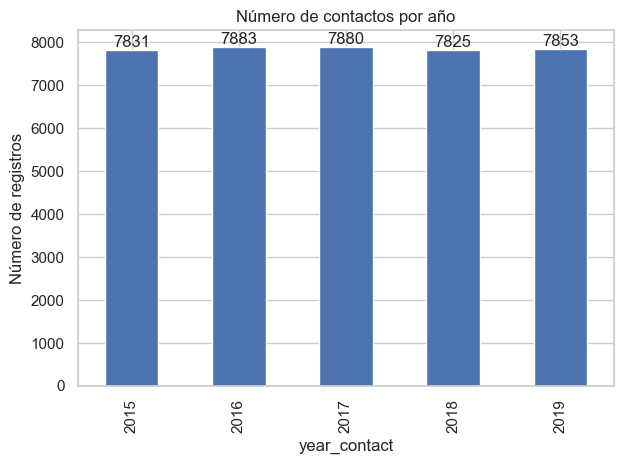

In [58]:
count_year = df_final['year_contact'].value_counts().sort_index()

ax = count_year.plot(kind='bar')

plt.title('Número de contactos por año')

plt.ylabel('Número de registros')

for i, v in enumerate(count_year):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

**Observaciones:**

El número de contactos por año se mantiene prácticamente constante entre 2015 y 2019, con cifras muy próximas en todos los ejercicios. El máximo se registra en 2016 con 7.883 contactos y el mínimo en 2018 con 7.825, una diferencia pequeña que confirma la estabilidad del volumen anual.

Esta regularidad sugiere que la actividad de contacto se sostuvo con una intensidad similar durante todo el periodo, sin cambios operativos destacados en la frecuencia de las campañas. En consecuencia, las comparaciones temporales se ven menos afectadas por variaciones en el tamaño muestral de cada año.

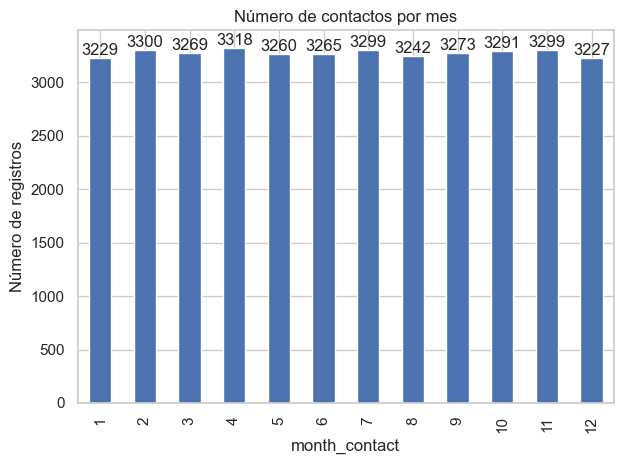

In [59]:
count_month = df_final['month_contact'].value_counts().sort_index()

ax2 = count_month.plot(kind='bar')

plt.title('Número de contactos por mes')

plt.ylabel('Número de registros')

for i, v in enumerate(count_month):
    ax2.text(i, v, str(v), ha = 'center', va='bottom')

plt.tight_layout()

plt.show()

**Observaciones:**

El número de contactos por mes se mantiene muy estable a lo largo del año, con valores concentrados en torno a 3.200–3.300 registros mensuales. El máximo se observa en abril con 3.318 contactos y el mínimo en diciembre con 3.227, lo que supone una variación reducida entre meses.

Esta uniformidad indica que la actividad de la campaña no se concentró en periodos concretos, sino que se distribuyó de forma sostenida durante todo el año. Por tanto, posibles diferencias en la respuesta de los clientes por mes difícilmente se explicarían por cambios relevantes en la intensidad de contacto.

### Tasa de éxito a lo largo del tiempo

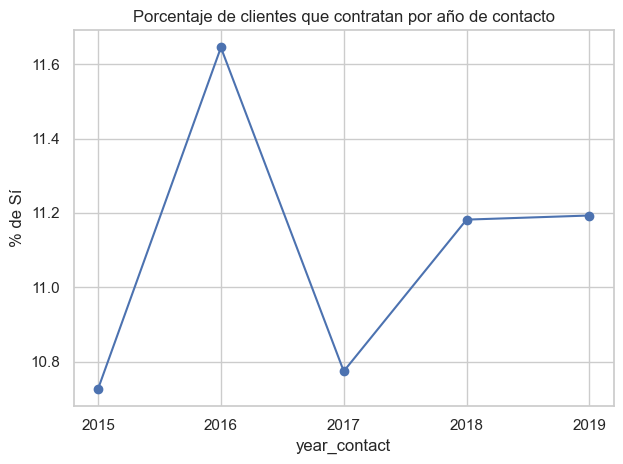

In [60]:
tasa_anual = pd.crosstab(df_final['year_contact'], df_final['y'], normalize='index') * 100

ax = tasa_anual['yes'].plot(marker='o')

ax.set_xticks(tasa_anual.index)                    

ax.set_xticklabels(tasa_anual.index.astype(int))   

plt.title('Porcentaje de clientes que contratan por año de contacto')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()

**Observaciones:**

El porcentaje de clientes que contratan se mantiene bastante estable durante 2015–2019, con oscilaciones moderadas en un rango aproximado entre el 10,7 % y el 11,7 %. El máximo se registra en 2016, con una tasa cercana al 11,7 %. A partir de ahí se observa una caída en 2017 y el mínimo aparece en 2015, ligeramente por debajo del 10,8 %. En 2018 y 2019 la proporción se recupera y se estabiliza alrededor del 11,2 %, aunque sin alcanzar el nivel de 2016. En conjunto, no se aprecia una tendencia sostenida al alza o a la baja, sino variaciones puntuales entre años.


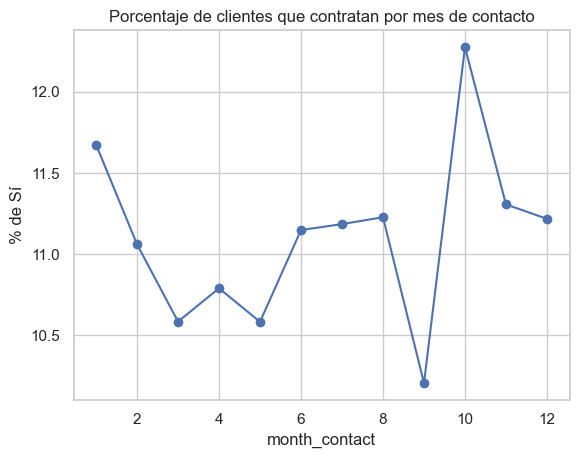

In [61]:
tasa_mensual = pd.crosstab(df_final['month_contact'], df_final['y'], normalize='index') * 100

tasa_mensual['yes'].plot(marker='o')

plt.title('Porcentaje de clientes que contratan por mes de contacto')

plt.ylabel('% de Sí')

plt.show()

**Observaciones:**

El porcentaje medio de contratación por mes, calculado agregando los contactos de 2015 a 2019, muestra variaciones moderadas a lo largo del año. Se observa un descenso desde enero hasta marzo y, a partir de ahí, las tasas se mantienen relativamente estables con oscilaciones suaves. El valor más bajo se registra en septiembre, mientras que octubre destaca como el mes con mayor porcentaje de contratación, situándose claramente por encima del resto. En conjunto, salvo el contraste puntual entre septiembre y octubre, no se aprecia una estacionalidad marcada, ya que la mayoría de meses se concentra en un rango similar de respuesta.

## Altas de clientes en el tiempo

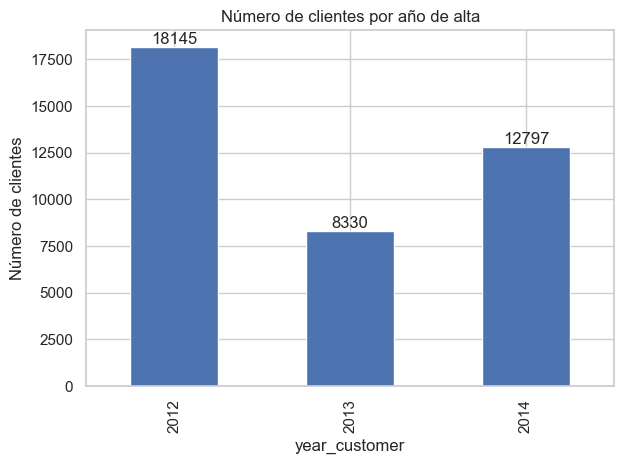

In [62]:
count_year_customer = df_final['year_customer'].value_counts().sort_index()

ax = count_year_customer.plot(kind='bar')

plt.title('Número de clientes por año de alta')

plt.ylabel('Número de clientes')

for i, v in enumerate(count_year_customer):
    
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

**Observaciones:**

El número de clientes incorporados presenta diferencias significativas entre los años analizados. En 2012 se registra el mayor volumen de altas, con 18.145 incorporaciones, muy por encima de 2013, que desciende hasta 8.330. En 2014 se observa una recuperación, alcanzando 12.797 altas, aunque todavía por debajo del nivel de 2012. Este comportamiento indica que el crecimiento de la base de clientes no fue constante, sino que estuvo condicionado por periodos con distinta capacidad de captación.

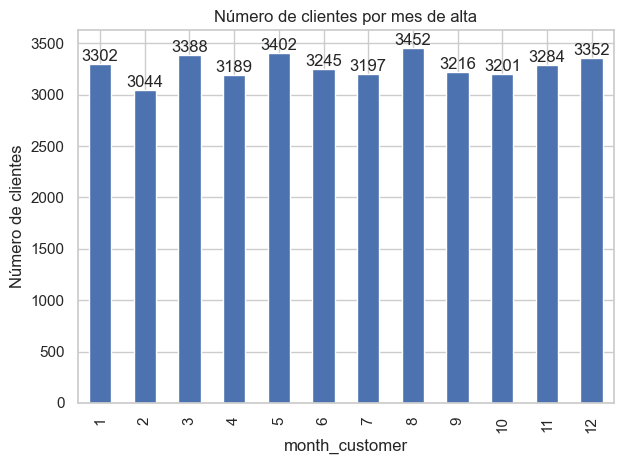

In [63]:
count_month_customer = df_final['month_customer'].value_counts().sort_index()

ax = count_month_customer.plot(kind='bar')

plt.title('Número de clientes por mes de alta')

plt.ylabel('Número de clientes')

for i, v in enumerate(count_month_customer):

    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

plt.show()

**Observaciones:**

El gráfico recoge el volumen total de altas por mes acumulado entre 2012 y 2014. En conjunto, la distribución es muy estable, con registros concentrados en un rango estrecho alrededor de 3.200–3.400 incorporaciones mensuales. El menor número de altas se observa en febrero, con 3.044, mientras que el máximo se registra en agosto, con 3.452, seguido de valores elevados en mayo, con 3.402.

Estas variaciones reflejan diferencias puntuales de captación en algunos meses, pero no evidencian un patrón estacional claro, ya que el nivel de incorporaciones se mantiene bastante constante a lo largo del año.

## Tasa de éxito según año de alta

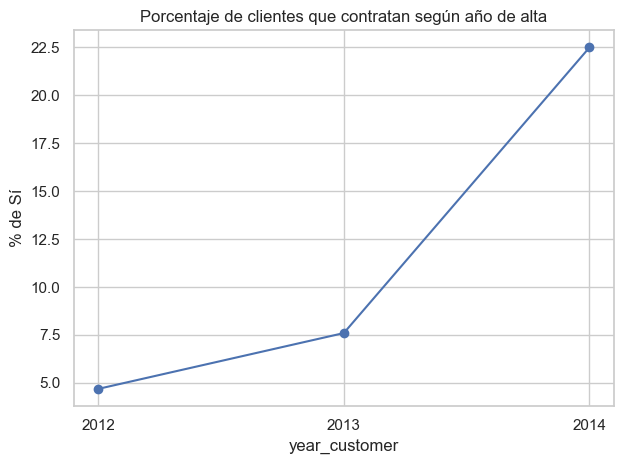

In [64]:
tasa_exito = pd.crosstab(df_final['year_customer'], df_final['y'], normalize='index') * 100

ax = tasa_exito['yes'].plot(marker='o') 

ax.set_xticks(tasa_exito.index)      

ax.set_xticklabels(tasa_exito.index.astype(int))     

plt.title('Porcentaje de clientes que contratan según año de alta')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()

**Observaciones:**

El porcentaje de contratación según el año de alta presenta una tendencia claramente ascendente. Los clientes dados de alta en 2012 muestran la tasa de conversión más baja, en 2013 se observa un incremento moderado y en 2014 se alcanza el nivel más elevado, con un aumento notable respecto a años anteriores. Este patrón indica que los clientes incorporados más recientemente son los que registran una mayor propensión a contratar el depósito, mientras que los perfiles con mayor antigüedad muestran menores tasas de respuesta.

En conjunto, los resultados sugieren que una relación más reciente con la entidad puede estar asociada a una mayor receptividad ante la oferta, posiblemente por un nivel de interacción o interés comercial más activo en las primeras etapas.

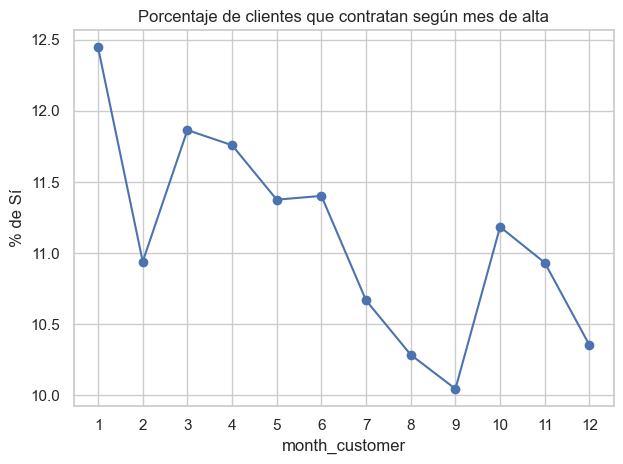

In [65]:
tasa_exito2 = pd.crosstab(df_final['month_customer'], df_final['y'], normalize='index') * 100

ax = tasa_exito2['yes'].plot(marker='o') 

ax.set_xticks(tasa_exito2.index)      

ax.set_xticklabels(tasa_exito2.index.astype(int))     

plt.title('Porcentaje de clientes que contratan según mes de alta')

plt.ylabel('% de Sí')

plt.tight_layout()

plt.show()

**Observaciones:**

El porcentaje de contratación según el mes de alta presenta variaciones moderadas a lo largo del año, sin evidenciar un patrón estacional consistente. El valor más alto se registra en enero, mientras que el mínimo se observa en septiembre, con una diferencia aproximada de 2,5 puntos porcentuales. A partir de julio se aprecia un descenso progresivo hasta septiembre, seguido de un repunte en octubre y una ligera corrección en los meses posteriores. En conjunto, la mayoría de meses se concentra en un intervalo relativamente estrecho, lo que sugiere que el mes de incorporación del cliente, por sí solo, no es un determinante fuerte de la probabilidad de contratar el depósito.

## Antiguedad del cliente en el momento del contacto

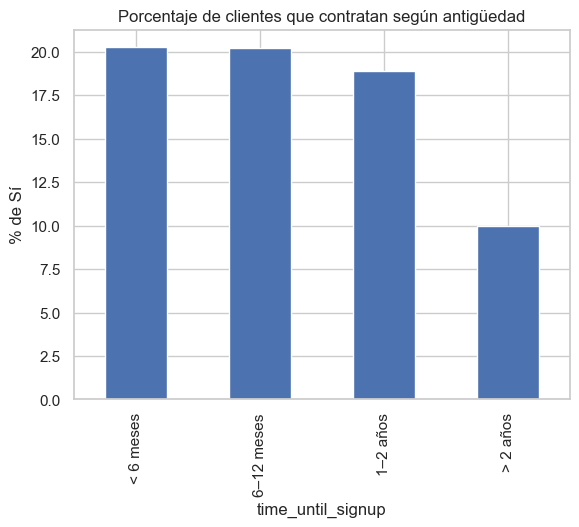

In [66]:
df_final['days_until_signup_num'] = df_final['days_until_signup'].dt.days

dias = [-1, 180, 365, 730, 3650]

grupos = ['< 6 meses', '6–12 meses', '1–2 años', '> 2 años']

df_final['time_until_signup'] = pd.cut(df_final['days_until_signup_num'], bins=dias, labels=grupos)

tasa_antiguedad = pd.crosstab(df_final['time_until_signup'], df_final['y'], normalize='index') * 100

tasa_antiguedad['yes'].plot(kind='bar')

plt.title('Porcentaje de clientes que contratan según antigüedad')

plt.ylabel('% de Sí')

plt.show()

**Observaciones:**

El porcentaje de contratación difiere de forma notable según la antigüedad del cliente. Los segmentos más recientes, con menos de 6 meses y entre 6 y 12 meses desde el alta, registran las tasas más altas, en torno al 20 %. A partir de ahí se observa un descenso, con el grupo de 1 a 2 años ligeramente por debajo, y una caída mucho más marcada en clientes con más de 2 años de antigüedad, que se sitúan alrededor del 10 %. En conjunto, el patrón sugiere que la campaña resulta más efectiva en clientes recién incorporados, mientras que una mayor permanencia en la entidad no se traduce en una mayor propensión a contratar el depósito.

## Se procede a guardar el dataset resultante como `'df_final_eda'`

In [67]:
df_final.to_parquet("../data/2.processed/df_final_eda.parquet", index=False)

# Conclusiones generales

El análisis exploratorio de datos ha permitido caracterizar de forma integral el comportamiento de los clientes contactados en las campañas de marketing telefónico y los factores asociados a la suscripción del depósito a plazo. La integración y depuración de las fuentes de datos ha dado lugar a un dataset unificado y consistente, que ha facilitado la identificación de patrones relevantes y diferencias entre segmentos de clientes, tanto en variables demográficas como de interacción y contexto macroeconómico.

Los resultados evidencian un claro desbalance en la variable objetivo, con una proporción minoritaria de suscripciones, lo que condiciona la interpretación y orienta el enfoque de análisis posterior. Entre las variables analizadas, la duración de la llamada destaca como el indicador más diferenciador entre clientes que suscriben y los que no. Además, las variables macroeconómicas muestran cambios sistemáticos entre ambos grupos, especialmente en euribor3m y, en menor medida, en emp.var.rate, cons.price.idx y cons.conf.idx, lo que sugiere que el contexto económico del momento del contacto influye en la respuesta.

En el plano categórico, se observan contrastes claros por canal de contacto, con mayor eficacia del contacto por móvil, y por resultado de campañas previas, donde un historial de éxito presenta una asociación muy fuerte con la suscripción. También se aprecian diferencias por ocupación y, de forma más moderada, por nivel educativo, mientras que otras variables muestran un impacto limitado a nivel descriptivo. Desde la perspectiva temporal, la intensidad de contactos se mantiene estable por año y mes, y los clientes más recientes muestran una mayor propensión a contratar, especialmente en los tramos de menor antigüedad.

En conjunto, el EDA permite delimitar las variables con mayor capacidad explicativa y perfilar segmentos con mayor probabilidad de conversión, proporcionando una base sólida para orientar decisiones comerciales y para desarrollar modelos predictivos más precisos en campañas futuras.